In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

62 63 69

In [2]:
os.chdir("../DATA")

In [6]:
HT_CULTURE_WDAY_INFO = pd.read_csv("./62.전국 문화가 있는 날 정보/HT_CULTURE_WDAY_INFO.csv", sep="|")
HT_CULTURE_WDAY_FCLTY = pd.read_csv("./63.전국 문화가 있는날 시설 데이터/HT_CULTURE_WDAY_FCLTY.csv", sep="|")
HT_CLTUR_DAY_FCLTY_INFO = pd.read_csv("./69.문화가 있는 날 활용 정보 분석 (통신융.복합)/HT_CLTUR_DAY_FCLTY_INFO.csv", sep="|")
HT_CLTUR_DAY_PRCUSE_ANALS = pd.read_csv("./69.문화가 있는 날 활용 정보 분석 (통신융.복합)/HT_CLTUR_DAY_PRCUSE_ANALS.csv", sep="|")

In [10]:
HT_CLTUR_DAY_FCLTY_INFO.head()
# 영화관 주변 유동인구 문화가있는날이 영화 5천원이었구나.. ㅋㅋㅋ

fclty_id       fclty_nm                            area_addr  city_do_cd  \
0      CM1         CGV 강남  서울특별시 강남구 역삼동 814-6 번지 스타플렉스 4층~11층          11   
1     CM10       씨네큐 구미봉곡                경상북도 구미시 봉곡동 36 번지 4층          37   
2    CM100     CGV 이시아폴리스                 대구광역시 동구 봉무동 1545 번지          22   
3    CM101    CGV 용산아이파크몰   서울특별시 용산구 한강로3가 40-999 번지 아이파크몰 6층          11   
4    CM102  메가박스 부천스타필드시티               경기도 부천시 소사구 옥길동 768 번지          31   

  ctprvn_nm  signgu_cd signgu_nm  adstrd_cd adstrd_nm         la          lo  
0     서울특별시      11230       강남구    1123064      역삼1동  37.501654  127.026390  
1      경상북도      37050       구미시    3705057     선주원남동  36.138280  128.315205  
2     대구광역시      22020        동구    2202063    불로·봉무동  35.921556  128.637345  
3     서울특별시      11030       용산구    1103073      한강로동  37.529563  126.964161  
4       경기도      31050       부천시    3105094       범안동  37.461539  126.813955

In [26]:
HT_CLTUR_DAY_FCLTY_INFO.fclty_nm.unique()

array(['CGV 강남', '씨네큐 구미봉곡', 'CGV 이시아폴리스', 'CGV 용산아이파크몰', '메가박스 부천스타필드시티',
       'CGV 성신여대입구', '롯데시네마 수지', 'CGV 대전가수원', '메가박스 경북도청', '횡성시네마',
       'CGV 이천', '메가박스 안산중앙', '씨네큐 경주보문', '롯데시네마 영종하늘도시', '씨네큐 충주연수',
       '롯데시네마서수원', 'CGV 화명', '메가박스송파파크하비오', '롯데시네마 대구현풍', '현대예술관시네마',
       '보성 작은영화관', '옥천 향수시네마', '화순 시네마', '메가박스 파주금촌', '청양 시네마',
       '곡성 작은영화관', '천재의 공간 영화산책', '정남진시네마', '마이골작은영화관', '강화작은영화관',
       '마실영화관', '무주 산골 영화관', '작은별영화관', '한누리디지털시네마', '롯데시네마 도곡',
       '칠곡 호이영화관', '울진 작은영화관', '함안군 작은영화관', '양구 정중앙 시네마', '영천공설시장 별빛영화관',
       '아리아리 정선시네마', '삼척 가람영화관', '합천시네마', '보물섬시네마', 'HAPPY700 평창시네마',
       '메가박스 창원내서', '화천 작은영화관 산천어 시네마', '화천 작은영화관 토마토 시네마',
       '화천 작은영화관 DMZ 시네마', '홍천시네마', '메가박스 첨단', '포천자동차극장', '광릉수목원자동차극장',
       '고한 시네마', '상주 삼백시네마', '영양 작은영화관', '메가박스 대전현대아울렛', '양양 작은영화관',
       'CGV 청담씨네시티', '롯데시네마 광복', '롯데시네마 오투(부산대)', '롯데시네마 센텀시티(백화점)',
       '롯데시네마 청주', '롯데시네마 부평', '롯데시네마 신도림', '롯데시네마 건대입구', '롯데시네마 월드타워',
       '롯데시네마 북수원', '헤이리시네마', 'CGV 청

In [30]:
HT_CLTUR_DAY_PRCUSE_ANALS[:10]

fclty_id fclty_nm   base_de  lcls_10s_belo_male_co  lcls_10s_male_co  \
0      CM1   CGV 강남  20180103                     25               144   
1      CM1   CGV 강남  20180110                     46                76   
2      CM1   CGV 강남  20180117                     63               363   
3      CM1   CGV 강남  20180124                      0               385   
4      CM1   CGV 강남  20180131                    286               294   
5      CM1   CGV 강남  20180207                     35                95   
6      CM1   CGV 강남  20180214                    190               120   
7      CM1   CGV 강남  20180221                     39               268   
8      CM1   CGV 강남  20180228                     29               295   
9      CM1   CGV 강남  20180307                     64               310   

   lcls_20s_male_co  lcls_30s_male_co  lcls_40s_male_co  lcls_50s_male_co  \
0               685               306               305                50   
1               843               271                10                24   
2               553               460                26               218   
3               695               372               347                81   
4               589               516               101               280   
5               597               309               249               169   
6               819               584               121               195   
7               372               530                73               121   
8               700               199               297               161   
9               607                60               268               173   

   lcls_60s_above_male_co  ...  otsd_60s_above_male_co  \
0                     311  ...                     142   
1                     286  ...                     270   
2                      52  ...                     390   
3                      99  ...                     347   
4                     279  ...                     115   
5                     244  ...                     252   
6                     292  ...                      34   
7                      43  ...                     159   
8                     256  ...                     408   
9                      77  ...                     309   

   otsd_10s_belo_female_co  otsd_10s_female_co  otsd_20s_female_co  \
0                      300                 817                4287   
1                      260                 796                5130   
2                      220                 973                4503   
3                       13                 788                3740   
4                      215                 734                4661   
5                       54                 750                3666   
6                       95                 883                4852   
7                       89                 620                4082   
8                      100                 583                4486   
9                       27                 204                3167   

   otsd_30s_female_co  otsd_40s_female_co  otsd_50s_female_co  \
0                 456                 256                 131   
1                 640                 571                 366   
2                1055                 747                 359   
3                 955                 499                 147   
4                 987                 600                 387   
5                 568                 333                 314   
6                1126                 158                 218   
7                 992                 476                   9   
8                1089                 367                 316   
9                 955                 334                 249   

   otsd_60s_above_female_co  otsd_all_total_co  frnr_all_total_co  
0                       108              11136                 21  
1                       241              13778                153  
2        

In [8]:
HT_CULTURE_WDAY_INFO.head()
#전국 문화가 있는 날

ctprvn_cd ctprvn_nm  signgu_cd signgu_nm   cl    co
0         11     서울특별시      11010       종로구  공연장  1440
1         11     서울특별시      11020        중구  공연장   594
2         11     서울특별시      11030       용산구  공연장     9
3         11     서울특별시      11040       성동구  공연장    52
4         11     서울특별시      11050       광진구  공연장   606

In [31]:
HT_CULTURE_WDAY_FCLTY
#전국 시절 정보

ctprvn_cd ctprvn_nm  signgu_cd signgu_nm        cl   co
0            11     서울특별시      11010       종로구       공연장  560
1            11     서울특별시      11020        중구       공연장  103
2            11     서울특별시      11030       용산구       공연장  184
3            11     서울특별시      11040       성동구       공연장  241
4            11     서울특별시      11050       광진구       공연장  222
...         ...       ...        ...       ...       ...  ...
2236         37      경상북도      37410       봉화군  휴양림 국립공원  194
2237         37      경상북도      37420       울진군  휴양림 국립공원   82
2238         38      경상남도      38090       거제시  휴양림 국립공원   16
2239         38      경상남도      38350       남해군  휴양림 국립공원  124
2240         38      경상남도      38380       함양군  휴양림 국립공원  299

[2241 rows x 6 columns]

In [12]:
HT_CLTUR_PBLPRFR_DYNMC_POPLTN_ANALS = pd.read_csv("./67.문화공연 유동인구 분석 (통신융.복합)/HT_CLTUR_PBLPRFR_DYNMC_POPLTN_ANALS.csv", sep="|")
HT_CLTUR_PBLPRFR_FCLTY_INFO = pd.read_csv("./67.문화공연 유동인구 분석 (통신융.복합)/HT_CLTUR_PBLPRFR_FCLTY_INFO.csv", sep="|")

In [16]:
HT_CLTUR_PBLPRFR_DYNMC_POPLTN_ANALS

fclty_id    fclty_nm   base_de  lcls_10s_belo_male_co  lcls_10s_male_co  \
0          PS1  서울공연예술연습공간  20180101                    296               244   
1          PS1  서울공연예술연습공간  20180102                     49               280   
2          PS1  서울공연예술연습공간  20180103                     33                 8   
3          PS1  서울공연예술연습공간  20180104                     24               162   
4          PS1  서울공연예술연습공간  20180105                    256                14   
...        ...         ...       ...                    ...               ...   
20447      PS9  부천공연예술연습공간  20200827                     77                59   
20448      PS9  부천공연예술연습공간  20200828                     46               146   
20449      PS9  부천공연예술연습공간  20200829                    133               342   
20450      PS9  부천공연예술연습공간  20200830                    158               172   
20451      PS9  부천공연예술연습공간  20200831                    300               191   

       lcls_20s_male_co  lcls_30s_male_co  lcls_40s_male_co  lcls_50s_male_co  \
0                   146               346               219               171   
1                   156               218               242                26   
2                   181                56               122               128   
3                   382               161                83                80   
4                    55               419                10               255   
...                 ...               ...               ...               ...   
20447                52               492               195               169   
20448                75                44               451               433   
20449               289               482               188               121   
20450               165               203               110               114   
20451               305               202                75                64   

       lcls_60s_above_male_co  ...  otsd_60s_above_male_co  \
0                         299  ...                      76   
1                         204  ...                     112   
2                         278  ...                     273   
3                          67  ...                      12   
4                         197  ...                     348   
...                       ...  ...                     ...   
20447                     448  ...                     230   
20448                      16  ...                     205   
20449                      34  ...                     241   
20450                     250  ...                     184   
20451                     207  ...                     129   

       otsd_10s_belo_female_co  otsd_10s_female_co  otsd_20s_female_co  \
0                           62                 238                2318   
1                          138                 699                1655   
2                          146                 561                2026   
3                          195                 550                1999   
4                          168                 414                2182   
...                        ...                 ...                 ...   
20447                      269                  81                 274   
20448                      252                  36                  74   
20449                       80                  66                 263   
20450                       98                 199                   0   
20451                      295                 280                  82   

       otsd_30s_female_co  otsd_40s_female_co  otsd_50s_female_co  \
0                     855                 556                 207   
1                     203                 235                 149   
2                     478                 296                 230   
3                     364                 664                 448   
4                    1102                 587                 510   
...         

In [15]:
HT_CLTUR_PBLPRFR_FCLTY_INFO

fclty_id    fclty_nm                 area_addr  city_do_cd ctprvn_nm  \
0       PS1  서울공연예술연습공간      서울특별시 종로구 대학로 10길 17          11     서울특별시   
1      PS10  청주공연예술연습공간      충청북도 청주시 청원구 상당로 314          33      충청북도   
2      PS11  아르코예술인력개발원  경기도 고양시 일산동구 성현로513번길 10          31       경기도   
3      PS12  전주공연예술연습공간     전라북도 전주시 덕진구 여암 1길 19          35      전라북도   
4      PS13  춘천공연예술연습공간             강원도 춘천시 삭주로 3          32       강원도   
5      PS14  세종공연예술연습공간       세종특별자치시 조치원읍 죽림리 79          29   세종특별자치시   
6      PS15  창원공연예술연습공간    경상남도 창원시 마산회원구 삼호로 136          38      경상남도   
7      PS17    아르코예술기록원          서울 서초구 서초동 710-1          11     서울특별시   
8      PS18  강진공연예술연습공간     전라남도 강진군 대구면 청자로 1335          36      전라남도   
9      PS19  금정공연예술연습공간            부산 금정구 구서동 481          21     부산광역시   
10      PS2  서천공연예술연습공간     충청남도 서천군 장항읍 성화로 26-2          34      충청남도   
11     PS20  광주공연예술연습공간    광주광역시 광산구 소촌로85번길 14-9          24     광주광역시   
12     PS22  인천공연예술연습공간     인천광역시 미추홀구 도화동 620-24          23     인천광역시   
13      PS3  울산공연예술연습공간     울산광역시 남구 거마로 134번길 20          26     울산광역시   
14      PS4       예술가의집           서울특별시 종로구 동숭길 3          11     서울특별시   
15      PS5  부산공연예술연습공간         부산광역시 남구 우암로 84-1          21     부산광역시   
16      PS6  대구공연예술연습공간           대구광역시 남구 명덕로 42          22     대구광역시   
17      PS7  포항공연예술연습공간       경상북도 포항시 북구 중앙로 373          37      경상북도   
18      PS8  원주공연예술연습공간            강원 원주시 명륜동 138          32       강원도   
19      PS9  부천공연예술연습공간           경기도 부천시 부일로 365          31       경기도   

    signgu_cd  signgu_nm  adstrd_cd adstrd_nm         la          lo  
0       11010        종로구    1101064       이화동  37.582046  127.003190  
1       33044    청주시 청원구    3304454      내덕2동  36.656201  127.492379  
2       31103   고양시 일산동구    3110360       고봉동  37.697055  126.839812  
3       35012    전주시 덕진구    3501271       여의동  35.871059  127.074510  
4       32010        춘천시    3201052        교동  37.882612  127.733116  
5       29010    세종특별자치시    2901011      조치원읍  36.593914  127.294401  
6       38114  창원시 마산회원구    3811456      양덕1동  35.225718  128.577193  
7       11220        서초구    1122051      서초1동  37.480597  127.014488  
8       36390        강진군    3639033       대구면  34.536243  126.794819  
9       21110        금정구    2111069      구서1동  35.246062  129.094300  
10      34340        서천군    3434011       장항읍  36.016653  126.684550  
11      24050        광산구    2405056       어룡동  35.152630  126.791235  
12      23090       미추홀구    2309062      도화1동  37.464237  126.666938  
13      26020         남구    2602051      신정1동  35.538121  129.304375  
14      11010        종로구    1101064       이화동  37.580541  127.003241  
15      21070         남구    2107062      감만1동  35.118423  129.081438  
16      22040         남구    2204056      대명1동  35.859283  128.575574  
17      37012     포항시 북구    3701267       중앙동  36.045967  129.364274  
18      32020        원주시    3202054      명륜1동  37.341113  127.950268  
19      31050        부천시    3105089        중동  37.488203  126.770467

In [17]:
HT_OFLNE_CLTUR_SPCE_DYNMC_POPLTN_ANALS = pd.read_csv("./68.오프라인문화공간 유동인구 분석 (통신융.복합)/HT_OFLNE_CLTUR_SPCE_DYNMC_POPLTN_ANALS.csv", sep = "|")
HT_OFLNE_CLTUR_SPCE_FCLTY_INFO = pd.read_csv("./68.오프라인문화공간 유동인구 분석 (통신융.복합)/HT_OFLNE_CLTUR_SPCE_FCLTY_INFO.csv", sep="|")

In [18]:
HT_OFLNE_CLTUR_SPCE_DYNMC_POPLTN_ANALS

fclty_id       fclty_nm   base_de  lcls_10s_belo_male_co  \
0          SA1  밀양 누루(樓樓) 미술관  20180101                      7   
1          SA1  밀양 누루(樓樓) 미술관  20180102                    285   
2          SA1  밀양 누루(樓樓) 미술관  20180103                    280   
3          SA1  밀양 누루(樓樓) 미술관  20180104                    196   
4          SA1  밀양 누루(樓樓) 미술관  20180105                     65   
...        ...            ...       ...                    ...   
16552      SA9      봉평콧등작은미술관  20200827                    294   
16553      SA9      봉평콧등작은미술관  20200828                    135   
16554      SA9      봉평콧등작은미술관  20200829                    140   
16555      SA9      봉평콧등작은미술관  20200830                    115   
16556      SA9      봉평콧등작은미술관  20200831                     92   

       lcls_10s_male_co  lcls_20s_male_co  lcls_30s_male_co  lcls_40s_male_co  \
0                   132               199                63                41   
1                     5               141               245                69   
2                   150               235                32               231   
3                   155                57                79               274   
4                   138               151               116                69   
...                 ...               ...               ...               ...   
16552               198               213               203               290   
16553               161                39                51                13   
16554               299                38                93                42   
16555               178               173                19               320   
16556               268               158                39               308   

       lcls_50s_male_co  lcls_60s_above_male_co  ...  otsd_60s_above_male_co  \
0                   263                     225  ...                     107   
1                    81                     152  ...                       8   
2                   103                     154  ...                      95   
3                   246                     248  ...                     177   
4                   206                     284  ...                      28   
...                 ...                     ...  ...                     ...   
16552               167                     256  ...                     221   
16553                11                     187  ...                      86   
16554                15                     310  ...                     139   
16555                42                     116  ...                      19   
16556                13                      78  ...                     189   

       otsd_10s_belo_female_co  otsd_10s_female_co  otsd_20s_female_co  \
0                          147                 169                   4   
1                          118                   2                  88   
2                          208                 127                  96   
3                          150                 229                  31   
4                          145                   1                  53   
...                        ...                 ...                 ...   
16552                      102                 217                  49   
16553                       33                 167                 274   
16554                      177                 141                 270   
16555                       22                  97                 175   
16556                      162                 114                   9   

       otsd_30s_female_co  otsd_40s_female_co  otsd_50s_female_co  \
0                     119                   9                 156   
1                     109                 283                 201   
2                     176                  70                   5   
3                     265                  44                 159   
4                      77                 291

In [20]:
HT_OFLNE_CLTUR_SPCE_DYNMC_POPLTN_ANALS.fclty_nm.unique()

array(['밀양 누루(樓樓) 미술관', '우리미술관', '소금나루 작은미술관', '바래길 작은미술관',
       '장생포고래로131 작은미술관', '작은미술관 보구곶', '서동 작은미술관', '아트터미널 작은미술관',
       '악양 작은미술관', '노인과 둔장바다 작은미술관', '기억을 모으는 미술관 ART-TEA', 'BRT 작은미술관',
       '정라항 그리go 작은미술관 4048', '정라항 그리go 작은미술관 5223',
       '정라항 그리go 작은미술관 5219', '정라항 그리go 작은미술관 1116', '봉평콧등작은미술관'],
      dtype=object)

In [19]:
HT_OFLNE_CLTUR_SPCE_FCLTY_INFO

fclty_id             fclty_nm                             area_addr  \
0       SA1        밀양 누루(樓樓) 미술관          경남 밀양시 하남읍 명례로 451 구. 명례초등학교   
1      SA10                우리미술관              인천광역시 동구 화도진로 192번길 3-11   
2      SA11           소금나루 작은미술관                         울산 북구 중리11길 2   
3      SA12            바래길 작은미술관              경남 남해군 남면 남면로1739번길 46-1   
4      SA13      장생포고래로131 작은미술관                    울산광역시 남구 장생포고래로131   
5      SA14             서동 작은미술관  부산광역시 금정구 서동로149번길 8(서동) 서동예술창작공간 1층   
6      SA15            작은미술관 보구곶                  경기도 김포시 월곶면 문수산로 373   
7      SA16          아트터미널 작은미술관                   강원도 정선군 고한읍 지장천로856   
8      SA17             악양 작은미술관          경남 하동군 악양면 악양동로 176 악양생활문화센터   
9       SA2       노인과 둔장바다 작은미술관                 전라남도 신안군 자은면 둔장길 33-4   
10      SA3  기억을 모으는 미술관 ART-TEA                    강원도 태백시 장성1길 102-5   
11      SA4  정라항 그리go 작은미술관 4048                   강원도 삼척시 정라항안길 40-48   
12      SA5  정라항 그리go 작은미술관 5223                   강원도 삼척시 정라항안길 52-23   
13      SA6  정라항 그리go 작은미술관 5219                   강원도 삼척시 정라항안길 52-19   
14      SA7  정라항 그리go 작은미술관 1116                   강원도 삼척시 나리골3길 11-16   
15      SA8            BRT 작은미술관              세종특별자치시 나성동 719 BRT작은미술관   
16      SA9            봉평콧등작은미술관         강원도 평창군 봉평면 덕거길 7-1 봉평콧등작은미술관   

    city_do_cd ctprvn_nm  signgu_cd signgu_nm  adstrd_cd adstrd_nm         la  \
0           38      경상남도      38080       밀양시    3808012       하남읍  35.353989   
1           23     인천광역시      23020        동구    2302051       만석동  37.486228   
2           26     울산광역시      26040        북구    2604059       염포동  35.526847   
3           38      경상남도      38350       남해군    3835035        남면  34.767482   
4           26     울산광역시      26020        남구    2602061    야음장생포동  35.501992   
5           21     부산광역시      21110       금정구    2111051       서1동  35.215230   
6           31       경기도      31230       김포시    3123035       월곶면  37.757619   
7           32       강원도      32350       정선군    3235012       고한읍  37.219763   
8           38      경상남도      38360       하동군    3836032       악양면  35.146343   
9           36      전라남도      36480       신안군    3648033       자은면  34.913779   
10          32       강원도      32050       태백시    3205056       장성동  37.099040   
11          32       강원도      32070       삼척시    3207054       정라동  37.440859   
12          32       강원도      32070       삼척시    3207054       정라동  37.440647   
13          32       강원도      32070       삼척시    3207054       정라동  37.440657   
14          32       강원도      32070       삼척시    3207054       정라동  37.439811   
15          29   세종특별자치시      29010   세종특별자치시    2901062       새롬동  36.481003   
16          32       강원도      32340       평창군    3234034       봉평면  37.642716   

            lo  
0   128.766001  
1   126.622538  
2   129.399106  
3   127.847901  
4   129.369294  
5   129.103512  
6   126.529852  
7   128.834590  
8   127.705226  
9   126.062714  
10  129.004899  
11  129.191256  
12  129.190843  
13  129.190973  
14  129.186605  
15  127.261273  
16  128.395034

In [267]:
os.chdir("../k-means")

In [2]:
os.getcwd()

'C:\\Users\\gmlrn\\Desktop\\AI_SCHOOL\\art_data\\k-means'

In [16]:
HT_CLTURART_DYNMC_POPLTN_ANALS = pd.read_csv("./HT_CLTURART_DYNMC_POPLTN_ANALS.csv", sep="|")
# HT_CLTURART_FCLTY_INFO = pd.read_csv("./71.전국문화예술회관 유동인구 분석 정보(통신융.복합)/HT_CLTURART_FCLTY_INFO.csv", sep="|")

In [17]:
HT_CLTURART_DYNMC_POPLTN_ANALS

fclty_id  fclty_nm   base_de  tmp_lcls_10s_belo_male_co  \
0        AC191      예울마루  20180203                          6   
1        AC191      예울마루  20180204                          2   
2        AC191      예울마루  20180205                          4   
3        AC191      예울마루  20180206                          0   
4        AC191      예울마루  20180716                          0   
...        ...       ...       ...                        ...   
19475    AC210  해남문화예술회관  20200827                         27   
19476    AC210  해남문화예술회관  20200828                         26   
19477    AC210  해남문화예술회관  20200829                         34   
19478    AC210  해남문화예술회관  20200830                         51   
19479    AC210  해남문화예술회관  20200831                         32   

       tmp_lcls_10s_male_co  tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  \
0                        76                    40                    61   
1                        29                    32                   116   
2                        40                    31                    57   
3                        21                    30                    46   
4                        63                    29                    81   
...                     ...                   ...                   ...   
19475                   196                   168                   254   
19476                   234                   128                   203   
19477                   141                   109                   189   
19478                    93                   128                   142   
19479                   234                   140                   179   

       tmp_lcls_40s_male_co  tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                        93                    47                          40   
1                        90                    54                          80   
2                        44                    39                          51   
3                        50                    84                          62   
4                        55                    57                          81   
...                     ...                   ...                         ...   
19475                   175                   323                         294   
19476                   312                   216                         223   
19477                   176                   213                         111   
19478                   129                   187                         146   
19479                   332                   231                         241   

       ...  tmp_otsd_60s_above_male_co  tmp_otsd_10s_belo_female_co  \
0      ...                           0                            0   
1      ...                           0                            2   
2      ...                           0                            0   
3      ...                           0                            0   
4      ...                           9                            0   
...    ...                         ...                          ...   
19475  ...                          38                           29   
19476  ...                          48                           26   
19477  ...                          34                           29   
19478  ...                          34                            2   
19479  ...                          52                           16   

       tmp_otsd_10s_female_co  tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  \
0                          34                      57                      15   
1                          46                       6                      46   
2                          30                      18                       0   
3                          44                       0                       0   
4                           0                       8                       2   
...         

--------------------------------

In [42]:
c = pd.read_csv("./new_combined.csv", sep="|")

In [43]:
c["base_de"] = pd.to_datetime(c["base_de"], format="%Y%m%d")

In [46]:
fclty_list = c.fclty_nm.unique()

In [105]:
len(fclty_list)

57

In [108]:
sum_df = pd.DataFrame(columns=['fclty_id', 'fclty_nm', 'tmp_lcls_10s_belo_male_co',
       'tmp_lcls_10s_male_co', 'tmp_lcls_20s_male_co', 'tmp_lcls_30s_male_co',
       'tmp_lcls_40s_male_co', 'tmp_lcls_50s_male_co',
       'tmp_lcls_60s_above_male_co', 'tmp_lcls_10s_belo_female_co',
       'tmp_lcls_10s_female_co', 'tmp_lcls_20s_female_co',
       'tmp_lcls_30s_female_co', 'tmp_lcls_40s_female_co',
       'tmp_lcls_50s_female_co', 'tmp_lcls_60s_above_female_co',
       'lcls_all_total_co', 'tmp_otsd_10s_belo_male_co',
       'tmp_otsd_10s_male_co', 'tmp_otsd_20s_male_co', 'tmp_otsd_30s_male_co',
       'tmp_otsd_40s_male_co', 'tmp_otsd_50s_male_co',
       'tmp_otsd_60s_above_male_co', 'tmp_otsd_10s_belo_female_co',
       'tmp_otsd_10s_female_co', 'tmp_otsd_20s_female_co',
       'tmp_otsd_30s_female_co', 'tmp_otsd_40s_female_co',
       'tmp_otsd_50s_female_co', 'tmp_otsd_60s_above_female_co',
       'otsd_all_total_co', 'tmp_frnr_all_total_co'])
sum_df

Empty DataFrame
Columns: [fclty_id, fclty_nm, tmp_lcls_10s_belo_male_co, tmp_lcls_10s_male_co, tmp_lcls_20s_male_co, tmp_lcls_30s_male_co, tmp_lcls_40s_male_co, tmp_lcls_50s_male_co, tmp_lcls_60s_above_male_co, tmp_lcls_10s_belo_female_co, tmp_lcls_10s_female_co, tmp_lcls_20s_female_co, tmp_lcls_30s_female_co, tmp_lcls_40s_female_co, tmp_lcls_50s_female_co, tmp_lcls_60s_above_female_co, lcls_all_total_co, tmp_otsd_10s_belo_male_co, tmp_otsd_10s_male_co, tmp_otsd_20s_male_co, tmp_otsd_30s_male_co, tmp_otsd_40s_male_co, tmp_otsd_50s_male_co, tmp_otsd_60s_above_male_co, tmp_otsd_10s_belo_female_co, tmp_otsd_10s_female_co, tmp_otsd_20s_female_co, tmp_otsd_30s_female_co, tmp_otsd_40s_female_co, tmp_otsd_50s_female_co, tmp_otsd_60s_above_female_co, otsd_all_total_co, tmp_frnr_all_total_co]
Index: []

[0 rows x 33 columns]

In [109]:
for fclty in fclty_list:
    df = c[c["fclty_nm"] == fclty].iloc[-7:, :2][-1:].reset_index().drop(columns="index")
#     display(df)
 
    df1 = pd.DataFrame( c[c["fclty_nm"] == fclty].iloc[-7:, 3:].sum()).T
#     display(df1)

    df2 = pd.concat( [df, df1], axis=1)
#     display(df2)
    sum_df = pd.concat( [sum_df, df2 ], ignore_index=True )

fclty_id    fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0      PS1  서울공연예술연습공간                         20                    64   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   556                   272                   310   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   231                          96   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           20  ...                         173   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           31                     491   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                    3790                     988                     386   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     176                            91               9699   

   tmp_frnr_all_total_co  
0                     38  

[1 rows x 33 columns]

fclty_id  fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0     PS17  아르코예술기록원                         48                    29   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                    38                    36                    44   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                    29                          34   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           41  ...                          33   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           47                      20   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                      21                      28                      16   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      66                            34                479   

   tmp_frnr_all_total_co  
0                     36  

[1 rows x 33 columns]

fclty_id    fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0     PS10  청주공연예술연습공간                         40                   136   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                  1562                   429                   493   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   387                         430   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           32  ...                         118   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           37                     112   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     330                     177                     106   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     165                            47               2820   

   tmp_frnr_all_total_co  
0                     49  

[1 rows x 33 columns]

fclty_id    fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0     PS11  아르코예술인력개발원                         39                   238   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   514                   705                   611   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   773                         829   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           44  ...                         710   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           47                     266   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     384                     393                     467   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     490                           304               5503   

   tmp_frnr_all_total_co  
0                     27  

[1 rows x 33 columns]

fclty_id    fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0     PS12  전주공연예술연습공간                        137                  1292   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                  2132                  2951                  3463   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                  4339                        3296   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                          502  ...                        1468   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                          256                     335   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     819                     995                     869   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     899                          1047              13406   

   tmp_frnr_all_total_co  
0                     31  

[1 rows x 33 columns]

fclty_id    fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0     PS13  춘천공연예술연습공간                         37                    30   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   625                   168                   276   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   158                         415   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           43  ...                          57   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           32                      50   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     221                      55                      56   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      29                            37                884   

   tmp_frnr_all_total_co  
0                     32  

[1 rows x 33 columns]

fclty_id    fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0     PS14  세종공연예술연습공간                        301                  2364   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                  4174                  4170                  3374   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                  4124                        4208   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                          336  ...                        1092   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           99                     865   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                    1525                     612                     840   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                    1022                          1175              13408   

   tmp_frnr_all_total_co  
0                     13  

[1 rows x 33 columns]

fclty_id    fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0     PS15  창원공연예술연습공간                         29                   380   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   400                   501                   796   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   581                         548   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                          162  ...                         251   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           87                     103   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     189                     252                     155   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      90                           165               2052   

   tmp_frnr_all_total_co  
0                     44  

[1 rows x 33 columns]

fclty_id    fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0     PS18  강진공연예술연습공간                         33                   120   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                    53                    27                    29   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                    98                          58   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           31  ...                          72   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           32                      92   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     106                      80                     123   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     125                            98               1370   

   tmp_frnr_all_total_co  
0                     47  

[1 rows x 33 columns]

fclty_id    fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0     PS19  금정공연예술연습공간                         29                    49   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   118                   133                   316   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   300                         122   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           33  ...                          54   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           38                     171   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                      54                      34                     125   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      83                            48               1117   

   tmp_frnr_all_total_co  
0                     35  

[1 rows x 33 columns]

fclty_id    fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0      PS2  서천공연예술연습공간                         37                    83   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   142                    61                   163   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   198                         304   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           29  ...                          37   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           29                      36   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                      24                      54                      37   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      49                            38                714   

   tmp_frnr_all_total_co  
0                     38  

[1 rows x 33 columns]

fclty_id    fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0      PS5  부산공연예술연습공간                         19                    79   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   155                   181                   321   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   327                         442   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           76  ...                          70   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           38                      28   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                      24                      58                      74   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      95                            39                688   

   tmp_frnr_all_total_co  
0                     27  

[1 rows x 33 columns]

fclty_id    fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0     PS20  광주공연예술연습공간                         50                   171   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   175                   490                   507   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   418                         307   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           52  ...                          79   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           26                      35   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                      96                      76                      74   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      81                           153               1214   

   tmp_frnr_all_total_co  
0                     28  

[1 rows x 33 columns]

fclty_id    fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0      PS9  부천공연예술연습공간                        104                   433   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                  1227                  1597                  1498   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                  1300                        1670   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                          111  ...                         179   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           60                     195   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     203                     218                     185   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     451                           348               4043   

   tmp_frnr_all_total_co  
0                     41  

[1 rows x 33 columns]

fclty_id    fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0     PS22  인천공연예술연습공간                        242                   764   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                  1793                  1992                  1599   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                  1878                        1883   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                          105  ...                         859   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                          102                     179   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     492                     551                     439   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     800                           623               8008   

   tmp_frnr_all_total_co  
0                     26  

[1 rows x 33 columns]

fclty_id    fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0      PS3  울산공연예술연습공간                         77                  1052   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                  1384                  1754                  1415   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                  1274                        1743   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                          185  ...                         417   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           83                     323   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     270                     266                     593   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     464                           383               4949   

   tmp_frnr_all_total_co  
0                     39  

[1 rows x 33 columns]

fclty_id fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0      PS4    예술가의집                         65                    94   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   681                   575                   564   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   315                         398   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           34  ...                         415   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           27                     502   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                    2555                    1092                     811   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     343                           494              10824   

   tmp_frnr_all_total_co  
0                     47  

[1 rows x 33 columns]

fclty_id    fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0      PS6  대구공연예술연습공간                         32                    38   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   108                   120                   184   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   221                         410   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           31  ...                         461   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           39                      89   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     266                     124                     245   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     357                           698               3778   

   tmp_frnr_all_total_co  
0                     43  

[1 rows x 33 columns]

fclty_id    fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0      PS7  포항공연예술연습공간                         44                   274   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   853                   602                   793   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   807                        1286   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           34  ...                         437   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           61                     133   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     316                     197                     432   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     107                           505               3567   

   tmp_frnr_all_total_co  
0                     30  

[1 rows x 33 columns]

fclty_id    fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0      PS8  원주공연예술연습공간                         29                   297   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   789                   505                   532   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   698                        1205   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                          115  ...                         193   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           42                      56   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     127                     164                     180   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     130                           134               1432   

   tmp_frnr_all_total_co  
0                     45  

[1 rows x 33 columns]

fclty_id fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0    AC191     예울마루                         80                   383   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   280                   310                   395   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   532                         652   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                            9  ...                         139   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                            3                      91   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     107                     125                     190   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     292                           123               1620   

   tmp_frnr_all_total_co  
0                      0  

[1 rows x 33 columns]

fclty_id fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0    AC194   고흥문화회관                          0                    12   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                    77                    75                    84   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   338                         777   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                            6  ...                          41   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                            0                       4   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     221                      55                      17   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     122                           180                787   

   tmp_frnr_all_total_co  
0                      0  

[1 rows x 33 columns]

fclty_id fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0    AC205  영광예술의전당                          0                   122   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                    19                    80                   190   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   105                         148   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           81  ...                          76   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           10                      11   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                      13                      24                     158   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                       7                            25                429   

   tmp_frnr_all_total_co  
0                      0  

[1 rows x 33 columns]

fclty_id fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0    AC192  남도소리울림터                         53                   111   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   253                   583                  1037   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   537                         459   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           32  ...                         412   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           92                     124   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     626                     283                     380   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     693                           375               7557   

   tmp_frnr_all_total_co  
0                      0  

[1 rows x 33 columns]

fclty_id fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0    AC193   강진군아트홀                        115                  1478   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   979                  1461                  2530   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                  2690                        4106   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                          361  ...                        1091   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           47                      94   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     625                     482                     784   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     711                           793               8941   

   tmp_frnr_all_total_co  
0                      0  

[1 rows x 33 columns]

fclty_id  fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0    AC195  곡성레저문화센터                        130                   634   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   931                   868                  1514   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                  1642                        2067   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                          162  ...                        1133   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                          103                     230   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     517                     175                     383   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     378                           931               6323   

   tmp_frnr_all_total_co  
0                      0  

[1 rows x 33 columns]

fclty_id  fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0    AC196  광양문화예술회관                         14                   604   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   279                   247                   290   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   657                        1058   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           10  ...                          21   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                            0                       3   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     297                     130                      13   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      78                            11               1210   

   tmp_frnr_all_total_co  
0                      0  

[1 rows x 33 columns]

fclty_id  fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0    AC197  구례문화예술회관                          2                   340   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   451                   762                  1442   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                  1385                        1812   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                          129  ...                         565   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                            8                     123   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     339                     303                     180   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     430                           519               5221   

   tmp_frnr_all_total_co  
0                      0  

[1 rows x 33 columns]

fclty_id  fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0    AC198  나주문화예술회관                        162                   677   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                  1042                  1323                  2794   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                  1622                        1320   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                          348  ...                         447   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           69                     282   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     435                     251                     579   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     182                           147               5360   

   tmp_frnr_all_total_co  
0                      0  

[1 rows x 33 columns]

fclty_id fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0    AC199   담양문화회관                        262                  1974   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                  1192                  1271                  1596   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                  1402                        1967   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                          326  ...                        1816   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           22                     444   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     727                     592                     544   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     729                           667              10815   

   tmp_frnr_all_total_co  
0                      3  

[1 rows x 33 columns]

fclty_id  fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0    AC207  장성문화예술회관                          0                    41   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                    27                     4                     7   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                    23                         112   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                            0  ...                          44   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                            0                       0   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                       0                       0                       6   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      33                             8                156   

   tmp_frnr_all_total_co  
0                      0  

[1 rows x 33 columns]

fclty_id   fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0    AC200  목포시문화예술회관                          0                    33   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   361                   125                   413   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   430                         597   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                            5  ...                         215   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           34                      16   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                      18                      48                      36   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      76                            31               1124   

   tmp_frnr_all_total_co  
0                      0  

[1 rows x 33 columns]

fclty_id    fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0    AC201  무안승달문화예술회관                        118                   232   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   536                   407                   431   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                  1040                        1050   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                          170  ...                         249   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           11                     119   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     475                      71                     155   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     119                           147               2298   

   tmp_frnr_all_total_co  
0                      0  

[1 rows x 33 columns]

fclty_id   fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0    AC202  보성군문화예술회관                          0                     9   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                    59                    73                   352   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   443                         503   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                            0  ...                         358   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                            0                      91   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                      70                      41                      45   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      81                            47               1442   

   tmp_frnr_all_total_co  
0                      0  

[1 rows x 33 columns]

fclty_id  fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0    AC203  순천문화예술회관                         19                   216   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   343                   746                   218   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   359                         276   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                            0  ...                          28   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                            0                     148   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     206                     134                      51   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                       4                            14                755   

   tmp_frnr_all_total_co  
0                      0  

[1 rows x 33 columns]

fclty_id fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0    AC204   여수시민회관                         22                    71   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   232                   143                   284   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   536                         776   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                            0  ...                         329   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                            0                       0   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                      10                       0                       4   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      46                           160                813   

   tmp_frnr_all_total_co  
0                      0  

[1 rows x 33 columns]

fclty_id   fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0    AC206  완도문화예술의전당                        150                   672   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   211                   196                   389   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   434                         470   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                          260  ...                           0   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                            0                      47   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                      26                       0                      10   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      47                             0                657   

   tmp_frnr_all_total_co  
0                      0  

[1 rows x 33 columns]

fclty_id  fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0    AC208  장흥문화예술회관                         28                   335   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   711                   487                   860   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                  1330                        1899   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                          204  ...                         685   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                          108                     275   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     410                     552                     420   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     840                           602               5889   

   tmp_frnr_all_total_co  
0                      0  

[1 rows x 33 columns]

fclty_id  fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0    AC209  진도향토문화회관                          0                   294   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   362                   241                   805   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   632                         556   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           28  ...                         214   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           13                      31   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     137                     150                      78   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      72                            15               1600   

   tmp_frnr_all_total_co  
0                      0  

[1 rows x 33 columns]

fclty_id  fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0    AC210  해남문화예술회관                        231                  1208   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   981                  1238                  1797   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                  1695                        1276   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                          211  ...                         279   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                          125                     706   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     239                     176                     331   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     193                           197               4267   

   tmp_frnr_all_total_co  
0                      0  

[1 rows x 33 columns]

fclty_id       fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0      SA1  밀양 누루(樓樓) 미술관                         84                    29   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                    78                   151                    85   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   258                         410   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           30  ...                         166   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           35                      45   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     197                      70                      73   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      89                           257               1616   

   tmp_frnr_all_total_co  
0                     39  

[1 rows x 33 columns]

fclty_id fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0     SA10    우리미술관                         28                    35   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   116                   159                   141   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   136                         184   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           28  ...                          75   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           43                      32   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                      19                      76                      19   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      33                            54                646   

   tmp_frnr_all_total_co  
0                     30  

[1 rows x 33 columns]

fclty_id    fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0     SA11  소금나루 작은미술관                         36                    37   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   429                   287                    88   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   667                         242   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           39  ...                          93   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           49                      65   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                      90                     162                      94   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      61                           165               2098   

   tmp_frnr_all_total_co  
0                     48  

[1 rows x 33 columns]

fclty_id   fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0     SA12  바래길 작은미술관                         40                    57   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                    35                    57                    67   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   103                         136   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           23  ...                         242   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           25                     147   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                      95                     354                     329   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     285                           439               3254   

   tmp_frnr_all_total_co  
0                     40  

[1 rows x 33 columns]

fclty_id         fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0     SA13  장생포고래로131 작은미술관                         38                    73   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   360                   364                   373   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   779                         430   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           30  ...                        1155   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           49                      41   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                      68                     121                     154   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      64                           229               3600   

   tmp_frnr_all_total_co  
0                     53  

[1 rows x 33 columns]

fclty_id   fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0     SA15  작은미술관 보구곶                         34                   181   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   269                   109                   136   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   406                         430   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           44  ...                         275   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           40                      32   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                      86                      51                      46   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      56                            38               1926   

   tmp_frnr_all_total_co  
0                     35  

[1 rows x 33 columns]

fclty_id  fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0     SA14  서동 작은미술관                         66                   263   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   863                   723                  1277   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                  1862                        3104   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           54  ...                        2798   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           75                     123   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     950                     294                     634   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                    1244                          2219              12565   

   tmp_frnr_all_total_co  
0                     25  

[1 rows x 33 columns]

fclty_id     fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0     SA16  아트터미널 작은미술관                         41                    35   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                    26                   118                   122   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   874                         220   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           40  ...                         122   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           42                      32   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                      36                      43                      32   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      36                            45                848   

   tmp_frnr_all_total_co  
0                     37  

[1 rows x 33 columns]

fclty_id  fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0     SA17  악양 작은미술관                         32                    53   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                    22                    73                   107   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   104                         476   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           22  ...                         233   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           37                      33   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                      30                      90                      45   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      63                            67               1101   

   tmp_frnr_all_total_co  
0                     30  

[1 rows x 33 columns]

fclty_id        fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0      SA2  노인과 둔장바다 작은미술관                         20                    40   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                    25                    34                    38   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                    95                         221   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           40  ...                         106   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           45                      39   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                      41                     113                      54   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      98                            39               1142   

   tmp_frnr_all_total_co  
0                     53  

[1 rows x 33 columns]

fclty_id             fclty_nm  tmp_lcls_10s_belo_male_co  \
0      SA3  기억을 모으는 미술관 ART-TEA                        137   

   tmp_lcls_10s_male_co  tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  \
0                   195                   186                   111   

   tmp_lcls_40s_male_co  tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   380                   457                         524   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           71  ...                          36   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           42                      42   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                      44                      39                      69   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      49                            82                643   

   tmp_frnr_all_total_co  
0                     31  

[1 rows x 33 columns]

fclty_id   fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0      SA8  BRT 작은미술관                         34                    49   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                   108                   173                   136   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   176                          72   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           27  ...                          38   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           25                      33   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                      82                      45                      46   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                      58                           102                843   

   tmp_frnr_all_total_co  
0                     19  

[1 rows x 33 columns]

fclty_id             fclty_nm  tmp_lcls_10s_belo_male_co  \
0      SA4  정라항 그리go 작은미술관 4048                         50   

   tmp_lcls_10s_male_co  tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  \
0                   138                   173                   483   

   tmp_lcls_40s_male_co  tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   589                  1107                         842   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           56  ...                         969   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           32                     120   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     730                     349                     602   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     885                          1005               8560   

   tmp_frnr_all_total_co  
0                     48  

[1 rows x 33 columns]

fclty_id             fclty_nm  tmp_lcls_10s_belo_male_co  \
0      SA5  정라항 그리go 작은미술관 5223                         29   

   tmp_lcls_10s_male_co  tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  \
0                   149                   113                   411   

   tmp_lcls_40s_male_co  tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   795                   697                         943   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           39  ...                        1023   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           35                     140   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     661                     310                     586   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     933                           982               9290   

   tmp_frnr_all_total_co  
0                     47  

[1 rows x 33 columns]

fclty_id             fclty_nm  tmp_lcls_10s_belo_male_co  \
0      SA6  정라항 그리go 작은미술관 5219                         40   

   tmp_lcls_10s_male_co  tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  \
0                   129                   148                   360   

   tmp_lcls_40s_male_co  tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   736                  1130                         813   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           47  ...                         759   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           29                     130   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     792                     378                     507   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     897                           980               8685   

   tmp_frnr_all_total_co  
0                     54  

[1 rows x 33 columns]

fclty_id             fclty_nm  tmp_lcls_10s_belo_male_co  \
0      SA7  정라항 그리go 작은미술관 1116                         17   

   tmp_lcls_10s_male_co  tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  \
0                    36                   416                   450   

   tmp_lcls_40s_male_co  tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                  1248                  1089                         724   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           36  ...                         612   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           57                     200   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                     245                     165                     268   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     196                           636               4388   

   tmp_frnr_all_total_co  
0                     40  

[1 rows x 33 columns]

fclty_id   fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0      SA9  봉평콧등작은미술관                         46                    52   

   tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  tmp_lcls_40s_male_co  \
0                    46                    44                   153   

   tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                   180                         195   

   tmp_lcls_10s_belo_female_co  ...  tmp_otsd_60s_above_male_co  \
0                           25  ...                         103   

   tmp_otsd_10s_belo_female_co  tmp_otsd_10s_female_co  \
0                           32                      23   

   tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  tmp_otsd_40s_female_co  \
0                      45                      33                      52   

   tmp_otsd_50s_female_co  tmp_otsd_60s_above_female_co  otsd_all_total_co  \
0                     123                            86                912   

   tmp_frnr_all_total_co  
0                     37  

[1 rows x 33 columns]

In [110]:
sum_df

fclty_id             fclty_nm tmp_lcls_10s_belo_male_co  \
0       PS1           서울공연예술연습공간                        20   
1      PS17             아르코예술기록원                        48   
2      PS10           청주공연예술연습공간                        40   
3      PS11           아르코예술인력개발원                        39   
4      PS12           전주공연예술연습공간                       137   
5      PS13           춘천공연예술연습공간                        37   
6      PS14           세종공연예술연습공간                       301   
7      PS15           창원공연예술연습공간                        29   
8      PS18           강진공연예술연습공간                        33   
9      PS19           금정공연예술연습공간                        29   
10      PS2           서천공연예술연습공간                        37   
11      PS5           부산공연예술연습공간                        19   
12     PS20           광주공연예술연습공간                        50   
13      PS9           부천공연예술연습공간                       104   
14     PS22           인천공연예술연습공간                       242   
15      PS3           울산공연예술연습공간                        77   
16      PS4                예술가의집                        65   
17      PS6           대구공연예술연습공간                        32   
18      PS7           포항공연예술연습공간                        44   
19      PS8           원주공연예술연습공간                        29   
20    AC191                 예울마루                        80   
21    AC194               고흥문화회관                         0   
22    AC205              영광예술의전당                         0   
23    AC192              남도소리울림터                        53   
24    AC193               강진군아트홀                       115   
25    AC195             곡성레저문화센터                       130   
26    AC196             광양문화예술회관                        14   
27    AC197             구례문화예술회관                         2   
28    AC198             나주문화예술회관                       162   
29    AC199               담양문화회관                       262   
30    AC207             장성문화예술회관                         0   
31    AC200            목포시문화예술회관                         0   
32    AC201           무안승달문화예술회관                       118   
33    AC202            보성군문화예술회관                         0   
34    AC203             순천문화예술회관                        19   
35    AC204               여수시민회관                        22   
36    AC206            완도문화예술의전당                       150   
37    AC208             장흥문화예술회관                        28   
38    AC209             진도향토문화회관                         0   
39    AC210             해남문화예술회관                       231   
40      SA1        밀양 누루(樓樓) 미술관                        84   
41     SA10                우리미술관                        28   
42     SA11           소금나루 작은미술관                        36   
43     SA12            바래길 작은미술관                        40   
44     SA13      장생포고래로131 작은미술관                        38   
45     SA15            작은미술관 보구곶                        34   
46     SA14             서동 작은미술관                        66   
47     SA16          아트터미널 작은미술관                        41   
48     SA17             악양 작은미술관                        32   
49      SA2       노인과 둔장바다 작은미술관                        20   
50      SA3  기억을 모으는 미술관 ART-TEA                       137   
51      SA8            BRT 작은미술관                        34   
52      SA4  정라항 그리go 작은미술관 4048                        50   
53      SA5  정라항 그리go 작은미술관 5223                        29   
54      SA6  정라항 그리go 작은미술관 5219                        40   
55      SA7  정라항 그리go 작은미술관 1116                        17   
56      SA9            봉평콧등작은미술관                        46   

   tmp_lcls_10s_male_co tmp_lcls_20s_male_co tmp_lcls_30s_male_co  \
0                    64                  556                  272   
1                    29                   38                   36   
2                   136                 1562                  429   
3                   238                  514                  705   
4                  1292                 2132                 

In [103]:
sum_df.to_csv("7days_data.csv", sep="|", index=False)

In [104]:
xx = pd.read_csv("7days_data.csv", sep="|")
xx

fclty_id             fclty_nm  tmp_lcls_10s_belo_male_co  \
0       PS1           서울공연예술연습공간                         20   
1      PS17             아르코예술기록원                         48   
2      PS10           청주공연예술연습공간                         40   
3      PS11           아르코예술인력개발원                         39   
4      PS12           전주공연예술연습공간                        137   
5      PS13           춘천공연예술연습공간                         37   
6      PS14           세종공연예술연습공간                        301   
7      PS15           창원공연예술연습공간                         29   
8      PS18           강진공연예술연습공간                         33   
9      PS19           금정공연예술연습공간                         29   
10      PS2           서천공연예술연습공간                         37   
11      PS5           부산공연예술연습공간                         19   
12     PS20           광주공연예술연습공간                         50   
13      PS9           부천공연예술연습공간                        104   
14     PS22           인천공연예술연습공간                        242   
15      PS3           울산공연예술연습공간                         77   
16      PS4                예술가의집                         65   
17      PS6           대구공연예술연습공간                         32   
18      PS7           포항공연예술연습공간                         44   
19      PS8           원주공연예술연습공간                         29   
20    AC191                 예울마루                         80   
21    AC194               고흥문화회관                          0   
22    AC205              영광예술의전당                          0   
23    AC192              남도소리울림터                         53   
24    AC193               강진군아트홀                        115   
25    AC195             곡성레저문화센터                        130   
26    AC196             광양문화예술회관                         14   
27    AC197             구례문화예술회관                          2   
28    AC198             나주문화예술회관                        162   
29    AC199               담양문화회관                        262   
30    AC207             장성문화예술회관                          0   
31    AC200            목포시문화예술회관                          0   
32    AC201           무안승달문화예술회관                        118   
33    AC202            보성군문화예술회관                          0   
34    AC203             순천문화예술회관                         19   
35    AC204               여수시민회관                         22   
36    AC206            완도문화예술의전당                        150   
37    AC208             장흥문화예술회관                         28   
38    AC209             진도향토문화회관                          0   
39    AC210             해남문화예술회관                        231   
40      SA1        밀양 누루(樓樓) 미술관                         84   
41     SA10                우리미술관                         28   
42     SA11           소금나루 작은미술관                         36   
43     SA12            바래길 작은미술관                         40   
44     SA13      장생포고래로131 작은미술관                         38   
45     SA15            작은미술관 보구곶                         34   
46     SA14             서동 작은미술관                         66   
47     SA16          아트터미널 작은미술관                         41   
48     SA17             악양 작은미술관                         32   
49      SA2       노인과 둔장바다 작은미술관                         20   
50      SA3  기억을 모으는 미술관 ART-TEA                        137   
51      SA8            BRT 작은미술관                         34   
52      SA4  정라항 그리go 작은미술관 4048                         50   
53      SA5  정라항 그리go 작은미술관 5223                         29   
54      SA6  정라항 그리go 작은미술관 5219                         40   
55      SA7  정라항 그리go 작은미술관 1116                         17   
56      SA9            봉평콧등작은미술관                         46   

    tmp_lcls_10s_male_co  tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  \
0                     64                   556                   272   
1                     29                    38                    36   
2                    136                  1562                   429   
3                    238                   514              

In [113]:
xx_list = xx.fclty_nm.unique()

In [111]:
cc = pd.read_csv("./info_combined.csv", sep ="|")
cc

fclty_id             fclty_nm                      area_addr  city_do_cd  \
0        PS1           서울공연예술연습공간           서울특별시 종로구 대학로 10길 17          11   
1       PS10           청주공연예술연습공간           충청북도 청주시 청원구 상당로 314          33   
2       PS11           아르코예술인력개발원       경기도 고양시 일산동구 성현로513번길 10          31   
3       PS12           전주공연예술연습공간          전라북도 전주시 덕진구 여암 1길 19          35   
4       PS13           춘천공연예술연습공간                  강원도 춘천시 삭주로 3          32   
..       ...                  ...                            ...         ...   
259      SA5  정라항 그리go 작은미술관 5223            강원도 삼척시 정라항안길 52-23          32   
260      SA6  정라항 그리go 작은미술관 5219            강원도 삼척시 정라항안길 52-19          32   
261      SA7  정라항 그리go 작은미술관 1116            강원도 삼척시 나리골3길 11-16          32   
262      SA8            BRT 작은미술관       세종특별자치시 나성동 719 BRT작은미술관          29   
263      SA9            봉평콧등작은미술관  강원도 평창군 봉평면 덕거길 7-1 봉평콧등작은미술관          32   

    ctprvn_nm  signgu_cd signgu_nm  adstrd_cd adstrd_nm         la          lo  
0       서울특별시      11010       종로구    1101064       이화동  37.582046  127.003190  
1        충청북도      33044   청주시 청원구    3304454      내덕2동  36.656201  127.492379  
2         경기도      31103  고양시 일산동구    3110360       고봉동  37.697055  126.839812  
3        전라북도      35012   전주시 덕진구    3501271       여의동  35.871059  127.074510  
4         강원도      32010       춘천시    3201052        교동  37.882612  127.733116  
..        ...        ...       ...        ...       ...        ...         ...  
259       강원도      32070       삼척시    3207054       정라동  37.440647  129.190843  
260       강원도      32070       삼척시    3207054       정라동  37.440657  129.190973  
261       강원도      32070       삼척시    3207054       정라동  37.439811  129.186605  
262   세종특별자치시      29010   세종특별자치시    2901062       새롬동  36.481003  127.261273  
263       강원도      32340       평창군    3234034       봉평면  37.642716  128.395034  

[264 rows x 11 columns]

In [114]:
zxc_df = pd.DataFrame(columns=["area_addr", "ctprvn_nm"])
zxc_df

Empty DataFrame
Columns: [area_addr, ctprvn_nm]
Index: []

In [120]:
for fclty in xx_list:
    df = cc[cc["fclty_nm"] == fclty][["fclty_nm", "area_addr", "ctprvn_nm"]]
    display(df)
    zxc_df = pd.concat([zxc_df, df], ignore_index=True)
#     break

fclty_nm             area_addr ctprvn_nm
0  서울공연예술연습공간  서울특별시 종로구 대학로 10길 17     서울특별시

fclty_nm         area_addr ctprvn_nm
7  아르코예술기록원  서울 서초구 서초동 710-1     서울특별시

fclty_nm             area_addr ctprvn_nm
1  청주공연예술연습공간  충청북도 청주시 청원구 상당로 314      충청북도

fclty_nm                 area_addr ctprvn_nm
2  아르코예술인력개발원  경기도 고양시 일산동구 성현로513번길 10       경기도

fclty_nm              area_addr ctprvn_nm
3  전주공연예술연습공간  전라북도 전주시 덕진구 여암 1길 19      전라북도

fclty_nm      area_addr ctprvn_nm
4  춘천공연예술연습공간  강원도 춘천시 삭주로 3       강원도

fclty_nm            area_addr ctprvn_nm
5  세종공연예술연습공간  세종특별자치시 조치원읍 죽림리 79   세종특별자치시

fclty_nm               area_addr ctprvn_nm
6  창원공연예술연습공간  경상남도 창원시 마산회원구 삼호로 136      경상남도

fclty_nm              area_addr ctprvn_nm
8  강진공연예술연습공간  전라남도 강진군 대구면 청자로 1335      전라남도

fclty_nm       area_addr ctprvn_nm
9  금정공연예술연습공간  부산 금정구 구서동 481     부산광역시

fclty_nm              area_addr ctprvn_nm
10  서천공연예술연습공간  충청남도 서천군 장항읍 성화로 26-2      충청남도

fclty_nm          area_addr ctprvn_nm
15  부산공연예술연습공간  부산광역시 남구 우암로 84-1     부산광역시

fclty_nm               area_addr ctprvn_nm
11  광주공연예술연습공간  광주광역시 광산구 소촌로85번길 14-9     광주광역시

fclty_nm        area_addr ctprvn_nm
19  부천공연예술연습공간  경기도 부천시 부일로 365       경기도

fclty_nm              area_addr ctprvn_nm
12  인천공연예술연습공간  인천광역시 미추홀구 도화동 620-24     인천광역시

fclty_nm              area_addr ctprvn_nm
13  울산공연예술연습공간  울산광역시 남구 거마로 134번길 20     울산광역시

fclty_nm        area_addr ctprvn_nm
14    예술가의집  서울특별시 종로구 동숭길 3     서울특별시

fclty_nm        area_addr ctprvn_nm
16  대구공연예술연습공간  대구광역시 남구 명덕로 42     대구광역시

fclty_nm            area_addr ctprvn_nm
17  포항공연예술연습공간  경상북도 포항시 북구 중앙로 373      경상북도

fclty_nm       area_addr ctprvn_nm
18  원주공연예술연습공간  강원 원주시 명륜동 138       강원도

fclty_nm                      area_addr ctprvn_nm
31     예울마루  전라남도 여수시 예울마루로 100 (시전동 1003)      전라남도

fclty_nm           area_addr ctprvn_nm
34   고흥문화회관  전남 고흥군 고흥읍 호형리 991      전라남도

fclty_nm                 area_addr ctprvn_nm
45  영광예술의전당  전라남도 영광군 영광읍 천년로13길 2-34      전라남도

fclty_nm                   area_addr ctprvn_nm
32  남도소리울림터  전남 무안군 삼향읍 남악로 222 남도소리울림터      전라남도

fclty_nm             area_addr ctprvn_nm
33   강진군아트홀  전라남도 강진군 강진읍 영랑로1길 9      전라남도

fclty_nm            area_addr ctprvn_nm
35  곡성레저문화센터  전라남도 곡성군 곡성읍 곡성로855      전라남도

fclty_nm              area_addr ctprvn_nm
36  광양문화예술회관  전라남도 광양시 광양읍 향교길 9-30      전라남도

fclty_nm             area_addr ctprvn_nm
37  구례문화예술회관  전라남도 구례군 구례읍 양정2길 11      전라남도

fclty_nm          area_addr ctprvn_nm
38  나주문화예술회관  전라남도 나주시 예향로 4137      전라남도

fclty_nm             area_addr ctprvn_nm
41   담양문화회관  전라남도 담양군 담양읍 지침6길 29      전라남도

fclty_nm             area_addr ctprvn_nm
47  장성문화예술회관  전라남도 장성군 장성읍 문화로 110      전라남도

fclty_nm         area_addr ctprvn_nm
39  목포시문화예술회관  전라남도 목포시 남농로 102      전라남도

fclty_nm           area_addr ctprvn_nm
42  무안승달문화예술회관  전라남도 무안군 무안읍 창포로 8      전라남도

fclty_nm               area_addr ctprvn_nm
43  보성군문화예술회관  전라남도 보성군 보성읍 송재로 281-9      전라남도

fclty_nm        area_addr ctprvn_nm
233  순천문화예술회관  전라남도 순천시 삼산로 16      전라남도

fclty_nm                      area_addr ctprvn_nm
44   여수시민회관  전라남도 여수시 좌수영로 69 (광무동 42-19)       전라남도

fclty_nm                 area_addr ctprvn_nm
46  완도문화예술의전당  전라남도 완도군 완도읍 개포로159번길 55      전라남도

fclty_nm            area_addr ctprvn_nm
48  장흥문화예술회관  전라남도 장흥군 장흥읍 읍성로 96      전라남도

fclty_nm               area_addr ctprvn_nm
49  진도향토문화회관  전라남도 진도군 진도읍 진도대로 7197      전라남도

fclty_nm           area_addr ctprvn_nm
50  해남문화예술회관  전라남도 해남군 해남읍 군청길 4      전라남도

fclty_nm                     area_addr ctprvn_nm
247  밀양 누루(樓樓) 미술관  경남 밀양시 하남읍 명례로 451 구. 명례초등학교      경상남도

fclty_nm                 area_addr ctprvn_nm
248    우리미술관  인천광역시 동구 화도진로 192번길 3-11     인천광역시

fclty_nm      area_addr ctprvn_nm
249  소금나루 작은미술관  울산 북구 중리11길 2     울산광역시

fclty_nm                 area_addr ctprvn_nm
250  바래길 작은미술관  경남 남해군 남면 남면로1739번길 46-1      경상남도

fclty_nm           area_addr ctprvn_nm
251  장생포고래로131 작은미술관  울산광역시 남구 장생포고래로131     울산광역시

fclty_nm             area_addr ctprvn_nm
253  작은미술관 보구곶  경기도 김포시 월곶면 문수산로 373       경기도

fclty_nm                             area_addr ctprvn_nm
252  서동 작은미술관  부산광역시 금정구 서동로149번길 8(서동) 서동예술창작공간 1층     부산광역시

fclty_nm            area_addr ctprvn_nm
254  아트터미널 작은미술관  강원도 정선군 고한읍 지장천로856       강원도

fclty_nm                     area_addr ctprvn_nm
255  악양 작은미술관  경남 하동군 악양면 악양동로 176 악양생활문화센터      경상남도

fclty_nm              area_addr ctprvn_nm
256  노인과 둔장바다 작은미술관  전라남도 신안군 자은면 둔장길 33-4      전라남도

fclty_nm           area_addr ctprvn_nm
257  기억을 모으는 미술관 ART-TEA  강원도 태백시 장성1길 102-5       강원도

fclty_nm                 area_addr ctprvn_nm
262  BRT 작은미술관  세종특별자치시 나성동 719 BRT작은미술관   세종특별자치시

fclty_nm            area_addr ctprvn_nm
258  정라항 그리go 작은미술관 4048  강원도 삼척시 정라항안길 40-48       강원도

fclty_nm            area_addr ctprvn_nm
259  정라항 그리go 작은미술관 5223  강원도 삼척시 정라항안길 52-23       강원도

fclty_nm            area_addr ctprvn_nm
260  정라항 그리go 작은미술관 5219  강원도 삼척시 정라항안길 52-19       강원도

fclty_nm            area_addr ctprvn_nm
261  정라항 그리go 작은미술관 1116  강원도 삼척시 나리골3길 11-16       강원도

fclty_nm                      area_addr ctprvn_nm
263  봉평콧등작은미술관  강원도 평창군 봉평면 덕거길 7-1 봉평콧등작은미술관       강원도

In [129]:
xx

fclty_id             fclty_nm  tmp_lcls_10s_belo_male_co  \
0       PS1           서울공연예술연습공간                         20   
1      PS17             아르코예술기록원                         48   
2      PS10           청주공연예술연습공간                         40   
3      PS11           아르코예술인력개발원                         39   
4      PS12           전주공연예술연습공간                        137   
5      PS13           춘천공연예술연습공간                         37   
6      PS14           세종공연예술연습공간                        301   
7      PS15           창원공연예술연습공간                         29   
8      PS18           강진공연예술연습공간                         33   
9      PS19           금정공연예술연습공간                         29   
10      PS2           서천공연예술연습공간                         37   
11      PS5           부산공연예술연습공간                         19   
12     PS20           광주공연예술연습공간                         50   
13      PS9           부천공연예술연습공간                        104   
14     PS22           인천공연예술연습공간                        242   
15      PS3           울산공연예술연습공간                         77   
16      PS4                예술가의집                         65   
17      PS6           대구공연예술연습공간                         32   
18      PS7           포항공연예술연습공간                         44   
19      PS8           원주공연예술연습공간                         29   
20    AC191                 예울마루                         80   
21    AC194               고흥문화회관                          0   
22    AC205              영광예술의전당                          0   
23    AC192              남도소리울림터                         53   
24    AC193               강진군아트홀                        115   
25    AC195             곡성레저문화센터                        130   
26    AC196             광양문화예술회관                         14   
27    AC197             구례문화예술회관                          2   
28    AC198             나주문화예술회관                        162   
29    AC199               담양문화회관                        262   
30    AC207             장성문화예술회관                          0   
31    AC200            목포시문화예술회관                          0   
32    AC201           무안승달문화예술회관                        118   
33    AC202            보성군문화예술회관                          0   
34    AC203             순천문화예술회관                         19   
35    AC204               여수시민회관                         22   
36    AC206            완도문화예술의전당                        150   
37    AC208             장흥문화예술회관                         28   
38    AC209             진도향토문화회관                          0   
39    AC210             해남문화예술회관                        231   
40      SA1        밀양 누루(樓樓) 미술관                         84   
41     SA10                우리미술관                         28   
42     SA11           소금나루 작은미술관                         36   
43     SA12            바래길 작은미술관                         40   
44     SA13      장생포고래로131 작은미술관                         38   
45     SA15            작은미술관 보구곶                         34   
46     SA14             서동 작은미술관                         66   
47     SA16          아트터미널 작은미술관                         41   
48     SA17             악양 작은미술관                         32   
49      SA2       노인과 둔장바다 작은미술관                         20   
50      SA3  기억을 모으는 미술관 ART-TEA                        137   
51      SA8            BRT 작은미술관                         34   
52      SA4  정라항 그리go 작은미술관 4048                         50   
53      SA5  정라항 그리go 작은미술관 5223                         29   
54      SA6  정라항 그리go 작은미술관 5219                         40   
55      SA7  정라항 그리go 작은미술관 1116                         17   
56      SA9            봉평콧등작은미술관                         46   

    tmp_lcls_10s_male_co  tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  \
0                     64                   556                   272   
1                     29                    38                    36   
2                    136                  1562                   429   
3                    238                   514              

In [128]:
zxc_df

area_addr ctprvn_nm             fclty_nm
0                   서울특별시 종로구 대학로 10길 17     서울특별시           서울공연예술연습공간
1                       서울 서초구 서초동 710-1     서울특별시             아르코예술기록원
2                   충청북도 청주시 청원구 상당로 314      충청북도           청주공연예술연습공간
3               경기도 고양시 일산동구 성현로513번길 10       경기도           아르코예술인력개발원
4                  전라북도 전주시 덕진구 여암 1길 19      전라북도           전주공연예술연습공간
5                          강원도 춘천시 삭주로 3       강원도           춘천공연예술연습공간
6                    세종특별자치시 조치원읍 죽림리 79   세종특별자치시           세종공연예술연습공간
7                 경상남도 창원시 마산회원구 삼호로 136      경상남도           창원공연예술연습공간
8                  전라남도 강진군 대구면 청자로 1335      전라남도           강진공연예술연습공간
9                         부산 금정구 구서동 481     부산광역시           금정공연예술연습공간
10                 충청남도 서천군 장항읍 성화로 26-2      충청남도           서천공연예술연습공간
11                     부산광역시 남구 우암로 84-1     부산광역시           부산공연예술연습공간
12                광주광역시 광산구 소촌로85번길 14-9     광주광역시           광주공연예술연습공간
13                       경기도 부천시 부일로 365       경기도           부천공연예술연습공간
14                 인천광역시 미추홀구 도화동 620-24     인천광역시           인천공연예술연습공간
15                 울산광역시 남구 거마로 134번길 20     울산광역시           울산공연예술연습공간
16                       서울특별시 종로구 동숭길 3     서울특별시                예술가의집
17                       대구광역시 남구 명덕로 42     대구광역시           대구공연예술연습공간
18                   경상북도 포항시 북구 중앙로 373      경상북도           포항공연예술연습공간
19                        강원 원주시 명륜동 138       강원도           원주공연예술연습공간
20         전라남도 여수시 예울마루로 100 (시전동 1003)      전라남도                 예울마루
21                    전남 고흥군 고흥읍 호형리 991      전라남도               고흥문화회관
22              전라남도 영광군 영광읍 천년로13길 2-34      전라남도              영광예술의전당
23            전남 무안군 삼향읍 남악로 222 남도소리울림터      전라남도              남도소리울림터
24                  전라남도 강진군 강진읍 영랑로1길 9      전라남도               강진군아트홀
25                   전라남도 곡성군 곡성읍 곡성로855      전라남도             곡성레저문화센터
26                 전라남도 광양시 광양읍 향교길 9-30      전라남도             광양문화예술회관
27                  전라남도 구례군 구례읍 양정2길 11      전라남도             구례문화예술회관
28                     전라남도 나주시 예향로 4137      전라남도             나주문화예술회관
29                  전라남도 담양군 담양읍 지침6길 29      전라남도               담양문화회관
30                  전라남도 장성군 장성읍 문화로 110      전라남도             장성문화예술회관
31                      전라남도 목포시 남농로 102      전라남도            목포시문화예술회관
32                    전라남도 무안군 무안읍 창포로 8      전라남도           무안승달문화예술회관
33                전라남도 보성군 보성읍 송재로 281-9      전라남도            보성군문화예술회관
34                       전라남도 순천시 삼산로 16      전라남도             순천문화예술회관
35         전라남도 여수시 좌수영로 69 (광무동 42-19)       전라남도               여수시민회관
36              전라남도 완도군 완도읍 개포로159번길 55      전라남도            완도문화예술의전당
37                   전라남도 장흥군 장흥읍 읍성로 96      전라남도             장흥문화예술회관
38                전라남도 진도군 진도읍 진도대로 7197      전라남도             진도향토문화회관
39                    전라남도 해남군 해남읍 군청길 4      전라남도             해남문화예술회관
40          경남 밀양시 하남읍 명례로 451 구. 명례초등학교      경상남도        밀양 누루(樓樓) 미술관
41              인천광역시 동구 화도진로 192번길 3-11     인천광역시                우리미술관
42                         울산 북구 중리11길 2     울산광역시           소금나루 작은미술관
43              경남 남해군 남면 남면로1739번길 46-1      경상남도            바래길 작은미술관
44                    울산광역시 남구 장생포고래로131     울산광역시      장생포고래로131 작은미술관
45                  경기도 김포시 월곶면 문수산로 373       경기도            작은미술관 보구곶
46  부산광역시 금정구 서동로149번길 8(서동) 서동예술창작공간 1층     부산광역시             서동 작은미술관
47                   강원도 정선군 고한읍 지장천로856       강원도          아트터미널 작은미술관
48          경남 하동군 악양면 악양동로 176 악양생활문화센터      경상남도             악양 작은미술관
49                 전라남도 신안군 자은면 둔장길 33-4      전라남도       노인과 둔장바다 작은미술관
50                    강원도 태백시 장성1길 102-5       강원도  기억을 모으는 미술관 ART-TEA
51              세종특별자치시 나성동 719 BRT작은미술관   세종특별자치시            BRT 작은미술관
52                   강원도 삼척시 정라항안길 40-48       강원도  정라항 그리go 작은미술관 4048
53                   강원도 삼척시 정라항안길 52-23       강원도  정라항 그리go 작은미술관 5223
54                   강원도 삼척시 정라항안길 52-19       강원도  정라항 그리go 작은미술관 5219

In [139]:
results = pd.concat([xx, zxc_df], axis=1)
results = results.iloc[:, 1:-1]
results

fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0            서울공연예술연습공간                         20                    64   
1              아르코예술기록원                         48                    29   
2            청주공연예술연습공간                         40                   136   
3            아르코예술인력개발원                         39                   238   
4            전주공연예술연습공간                        137                  1292   
5            춘천공연예술연습공간                         37                    30   
6            세종공연예술연습공간                        301                  2364   
7            창원공연예술연습공간                         29                   380   
8            강진공연예술연습공간                         33                   120   
9            금정공연예술연습공간                         29                    49   
10           서천공연예술연습공간                         37                    83   
11           부산공연예술연습공간                         19                    79   
12           광주공연예술연습공간                         50                   171   
13           부천공연예술연습공간                        104                   433   
14           인천공연예술연습공간                        242                   764   
15           울산공연예술연습공간                         77                  1052   
16                예술가의집                         65                    94   
17           대구공연예술연습공간                         32                    38   
18           포항공연예술연습공간                         44                   274   
19           원주공연예술연습공간                         29                   297   
20                 예울마루                         80                   383   
21               고흥문화회관                          0                    12   
22              영광예술의전당                          0                   122   
23              남도소리울림터                         53                   111   
24               강진군아트홀                        115                  1478   
25             곡성레저문화센터                        130                   634   
26             광양문화예술회관                         14                   604   
27             구례문화예술회관                          2                   340   
28             나주문화예술회관                        162                   677   
29               담양문화회관                        262                  1974   
30             장성문화예술회관                          0                    41   
31            목포시문화예술회관                          0                    33   
32           무안승달문화예술회관                        118                   232   
33            보성군문화예술회관                          0                     9   
34             순천문화예술회관                         19                   216   
35               여수시민회관                         22                    71   
36            완도문화예술의전당                        150                   672   
37             장흥문화예술회관                         28                   335   
38             진도향토문화회관                          0                   294   
39             해남문화예술회관                        231                  1208   
40        밀양 누루(樓樓) 미술관                         84                    29   
41                우리미술관                         28                    35   
42           소금나루 작은미술관                         36                    37   
43            바래길 작은미술관                         40                    57   
44      장생포고래로131 작은미술관                         38                    73   
45            작은미술관 보구곶                         34                   181   
46             서동 작은미술관                         66                   263   
47          아트터미널 작은미술관                         41                    35   
48             악양 작은미술관                         32                    53   
49       노인과 둔장바다 작은미술관                         20                    40   
50  기억을 모으는 미술관 ART-TEA                        137                   195   
51            BRT 작은미술관                         34             

In [140]:
results.to_csv("info_data.csv", sep="|", index=False)

In [141]:
asd = pd.read_csv("./info_data.csv", sep="|")
asd

fclty_nm  tmp_lcls_10s_belo_male_co  tmp_lcls_10s_male_co  \
0            서울공연예술연습공간                         20                    64   
1              아르코예술기록원                         48                    29   
2            청주공연예술연습공간                         40                   136   
3            아르코예술인력개발원                         39                   238   
4            전주공연예술연습공간                        137                  1292   
5            춘천공연예술연습공간                         37                    30   
6            세종공연예술연습공간                        301                  2364   
7            창원공연예술연습공간                         29                   380   
8            강진공연예술연습공간                         33                   120   
9            금정공연예술연습공간                         29                    49   
10           서천공연예술연습공간                         37                    83   
11           부산공연예술연습공간                         19                    79   
12           광주공연예술연습공간                         50                   171   
13           부천공연예술연습공간                        104                   433   
14           인천공연예술연습공간                        242                   764   
15           울산공연예술연습공간                         77                  1052   
16                예술가의집                         65                    94   
17           대구공연예술연습공간                         32                    38   
18           포항공연예술연습공간                         44                   274   
19           원주공연예술연습공간                         29                   297   
20                 예울마루                         80                   383   
21               고흥문화회관                          0                    12   
22              영광예술의전당                          0                   122   
23              남도소리울림터                         53                   111   
24               강진군아트홀                        115                  1478   
25             곡성레저문화센터                        130                   634   
26             광양문화예술회관                         14                   604   
27             구례문화예술회관                          2                   340   
28             나주문화예술회관                        162                   677   
29               담양문화회관                        262                  1974   
30             장성문화예술회관                          0                    41   
31            목포시문화예술회관                          0                    33   
32           무안승달문화예술회관                        118                   232   
33            보성군문화예술회관                          0                     9   
34             순천문화예술회관                         19                   216   
35               여수시민회관                         22                    71   
36            완도문화예술의전당                        150                   672   
37             장흥문화예술회관                         28                   335   
38             진도향토문화회관                          0                   294   
39             해남문화예술회관                        231                  1208   
40        밀양 누루(樓樓) 미술관                         84                    29   
41                우리미술관                         28                    35   
42           소금나루 작은미술관                         36                    37   
43            바래길 작은미술관                         40                    57   
44      장생포고래로131 작은미술관                         38                    73   
45            작은미술관 보구곶                         34                   181   
46             서동 작은미술관                         66                   263   
47          아트터미널 작은미술관                         41                    35   
48             악양 작은미술관                         32                    53   
49       노인과 둔장바다 작은미술관                         20                    40   
50  기억을 모으는 미술관 ART-TEA                        137                   195   
51            BRT 작은미술관                         34             

-------------------------------

In [18]:
HT_CLTURART_DYNMC_POPLTN_ANALS["base_de"] = pd.to_datetime(HT_CLTURART_DYNMC_POPLTN_ANALS["base_de"], format="%Y%m%d")

In [27]:
combined[combined["fclty_nm"] == "예울마루"]

fclty_id fclty_nm   base_de  tmp_lcls_10s_belo_male_co  \
0      AC191     예울마루  20180203                          6   
1      AC191     예울마루  20180204                          2   
2      AC191     예울마루  20180205                          4   
3      AC191     예울마루  20180206                          0   
4      AC191     예울마루  20180716                          0   
..       ...      ...       ...                        ...   
982    AC191     예울마루  20200827                          8   
983    AC191     예울마루  20200828                         13   
984    AC191     예울마루  20200829                         22   
985    AC191     예울마루  20200830                         15   
986    AC191     예울마루  20200831                          8   

     tmp_lcls_10s_male_co  tmp_lcls_20s_male_co  tmp_lcls_30s_male_co  \
0                      76                    40                    61   
1                      29                    32                   116   
2                      40                    31                    57   
3                      21                    30                    46   
4                      63                    29                    81   
..                    ...                   ...                   ...   
982                    48                    57                    45   
983                    49                    54                    48   
984                    62                    61                    48   
985                    94                    22                    30   
986                    65                    18                    48   

     tmp_lcls_40s_male_co  tmp_lcls_50s_male_co  tmp_lcls_60s_above_male_co  \
0                      93                    47                          40   
1                      90                    54                          80   
2                      44                    39                          51   
3                      50                    84                          62   
4                      55                    57                          81   
..                    ...                   ...                         ...   
982                    81                    75                          67   
983                    42                    43                          71   
984                    50                    81                         103   
985                    58                   117                          74   
986                    50                    72                         131   

     ...  tmp_otsd_60s_above_male_co  tmp_otsd_10s_belo_female_co  \
0    ...                           0                            0   
1    ...                           0                            2   
2    ...                           0                            0   
3    ...                           0                            0   
4    ...                           9                            0   
..   ...                         ...                          ...   
982  ...                          39                            0   
983  ...                          11                            0   
984  ...                          34                            3   
985  ...                           2                            0   
986  ...                           8                            0   

     tmp_otsd_10s_female_co  tmp_otsd_20s_female_co  tmp_otsd_30s_female_co  \
0                        34                      57                      15   
1                        46                       6                      46   
2                        30                      18                       0   
3                        44                       0                       0   
4                         0                       8                       2   
..                      ...                     ...                     ...   
982                       0                      10

In [182]:
HT_CLTURART_DYNMC_POPLTN_ANALS.columns

Index(['fclty_id', 'fclty_nm', 'base_de', 'lcls_10s_belo_male_co',
       'lcls_10s_male_co', 'lcls_20s_male_co', 'lcls_30s_male_co',
       'lcls_40s_male_co', 'lcls_50s_male_co', 'lcls_60s_above_male_co',
       'lcls_10s_belo_female_co', 'lcls_10s_female_co', 'lcls_20s_female_co',
       'lcls_30s_female_co', 'lcls_40s_female_co', 'lcls_50s_female_co',
       'lcls_60s_above_female_co', 'lcls_all_total_co',
       'otsd_10s_belo_male_co', 'otsd_10s_male_co', 'otsd_20s_male_co',
       'otsd_30s_male_co', 'otsd_40s_male_co', 'otsd_50s_male_co',
       'otsd_60s_above_male_co', 'otsd_10s_belo_female_co',
       'otsd_10s_female_co', 'otsd_20s_female_co', 'otsd_30s_female_co',
       'otsd_40s_female_co', 'otsd_50s_female_co', 'otsd_60s_above_female_co',
       'otsd_all_total_co', 'frnr_all_total_co', '요일'],
      dtype='object')

In [28]:
group_HT_CLTURART_DYNMC_POPLTN_ANALS = HT_CLTURART_DYNMC_POPLTN_ANALS.groupby(["fclty_nm", "base_de"])["tmp_lcls_10s_belo_male_co"].sum().unstack()

In [23]:
group_HT_CLTURART_DYNMC_POPLTN_ANALS.head()

base_de   2018-01-01  2018-01-02  2018-01-03  2018-01-04  2018-01-05  \
fclty_nm                                                               
강진군아트홀            17          15           7           9           8   
고흥문화회관             0           0           0           0           3   
곡성레저문화센터           2           0           0           4           2   
광양문화예술회관           4          11           8           6          16   
구례문화예술회관           3           2           5           0           0   

base_de   2018-01-06  2018-01-07  2018-01-08  2018-01-09  2018-01-10  ...  \
fclty_nm                                                              ...   
강진군아트홀            18          18           6          27          27  ...   
고흥문화회관             0           0           0           0           0  ...   
곡성레저문화센터           0           0           0           0           0  ...   
광양문화예술회관           2           2          10          13           7  ...   
구례문화예술회관           0           0           2           0           0  ...   

base_de   2020-08-22  2020-08-23  2020-08-24  2020-08-25  2020-08-26  \
fclty_nm                                                               
강진군아트홀            14           0           7          15          11   
고흥문화회관             0           0           0           0           0   
곡성레저문화센터          12          49          23          14          12   
광양문화예술회관           4           0          20           0           4   
구례문화예술회관           0           0           4           0           0   

base_de   2020-08-27  2020-08-28  2020-08-29  2020-08-30  2020-08-31  
fclty_nm                                                              
강진군아트홀            15          29          18           7          20  
고흥문화회관             0           0           0           0           0  
곡성레저문화센터           4          25          12          26          37  
광양문화예술회관           2           3           0           0           5  
구례문화예술회관           0           2           0           0           0  

[5 rows x 974 columns]

In [148]:
group_HT_CLTURART_DYNMC_POPLTN_ANALS.loc[:, :"2020-08-25"]

base_de     2018-01-01  2018-01-02  2018-01-03  2018-01-04  2018-01-05  \
fclty_nm                                                                 
3∙15 아트센터          1.0        13.0        48.0         2.0        81.0   
가평문화예술회관         115.0       115.0       137.0         8.0       211.0   
강남씨어터            175.0        71.0       258.0       277.0        57.0   
강동아트센터           236.0        49.0       122.0       108.0       114.0   
강릉단오제전수교육관       149.0        44.0       135.0       237.0       114.0   
...                ...         ...         ...         ...         ...   
홍천문화예술회관         268.0        86.0       257.0       282.0        16.0   
화강문화센터           261.0        32.0       266.0       211.0       162.0   
화성아트홀            295.0        67.0       273.0       209.0        64.0   
화천문화예술회관         138.0        47.0       167.0       223.0         1.0   
횡성문화예술회관         257.0        81.0        46.0       114.0       188.0   

base_de     2018-01-06  2018-01-07  2018-01-08  2018-01-09  2018-01-10  ...  \
fclty_nm                                                                ...   
3∙15 아트센터         24.0       130.0        85.0       304.0       108.0  ...   
가평문화예술회관         230.0        66.0       227.0       190.0       139.0  ...   
강남씨어터            118.0       150.0       137.0       251.0       256.0  ...   
강동아트센터           259.0        92.0       213.0       216.0       222.0  ...   
강릉단오제전수교육관       156.0       206.0       106.0        12.0         2.0  ...   
...                ...         ...         ...         ...         ...  ...   
홍천문화예술회관         226.0        25.0       196.0       235.0        41.0  ...   
화강문화센터             1.0       298.0         1.0       135.0       193.0  ...   
화성아트홀             83.0       152.0       243.0         0.0       248.0  ...   
화천문화예술회관         214.0       249.0       162.0       176.0         6.0  ...   
횡성문화예술회관         214.0       135.0        58.0       196.0       267.0  ...   

base_de     2020-08-16  2020-08-17  2020-08-18  2020-08-19  2020-08-20  \
fclty_nm                                                                 
3∙15 아트센터        102.0       172.0       122.0        33.0       219.0   
가평문화예술회관          81.0       264.0        48.0        10.0        12.0   
강남씨어터            201.0       272.0       267.0       111.0       207.0   
강동아트센터           110.0       162.0       209.0         5.0       172.0   
강릉단오제전수교육관        12.0        76.0       143.0        64.0        68.0   
...                ...         ...         ...         ...         ...   
홍천문화예술회관         271.0       150.0       246.0       169.0       254.0   
화강문화센터           178.0       278.0       215.0       124.0         5.0   
화성아트홀            226.0       151.0       231.0       255.0       168.0   
화천문화예술회관         128.0       279.0       124.0        15.0       293.0   
횡성문화예술회관         184.0       126.0       229.0        20.0        41.0   

base_de     2020-08-21  2020-08-22  2020-08-23  2020-08-24  2020-08-25  
fclty_nm                                                                
3∙15 아트센터         92.0       193.0       123.0       109.0        47.0  
가평문화예술회관          37.0        12.0        24.0       195.0        66.0  
강남씨어터            140.0       195.0       295.0       241.0        67.0  
강동아트센터             4.0       123.0       215.0       164.0       137.0  
강릉단오제전수교육관       202.0       217.0       161.0        65.0        89.0  
...                ...         ...         ...         ...         ...  
홍천문화예술회관         214.0        96.0        43.0       270.0       108.0  
화강문화센터             3.0       130.0       247.0       131.0       241.0  
화성아트홀            226.0        64.0        42.0        83.0       289.0  
화천문화예술회관         190.0       157.0       228.0        20.0       242.0  
횡성문화예술회관         242.0       157.0       218.0       274.0       234.0  

[227 rows x 968 columns]

In [78]:
group_HT_CLTURART_DYNMC_POPLTN_ANALS.columns

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2020-08-22', '2020-08-23', '2020-08-24', '2020-08-25',
               '2020-08-26', '2020-08-27', '2020-08-28', '2020-08-29',
               '2020-08-30', '2020-08-31'],
              dtype='datetime64[ns]', name='base_de', length=974, freq=None)

In [80]:
group_HT_CLTURART_DYNMC_POPLTN_ANALS.loc["3∙15 아트센터"].values

array([  1.,  13.,  48.,   2.,  81.,  24., 130.,  85., 304., 108.,  57.,
       277.,  79.,  62., 299., 243.,  79., 204., 219., 225., 281.,  66.,
       277.,   8., 270., 167., 236., 130., 224.,  47.,  25.,  17., 234.,
       217., 168., 177., 130., 213.,  90., 299.,  15., 124.,  28.,   1.,
       281., 105., 211., 162.,  53., 173.,  86.,  49., 207., 112., 253.,
       245., 180., 281., 107., 273.,  20., 114., 180.,  66., 145., 292.,
       220., 192.,  67., 305., 174.,  38., 163., 300., 181.,  72.,  12.,
       297., 108., 119., 188., 240.,  11., 150., 292., 168., 238.,  64.,
        97.,  97., 300., 249., 160., 174., 182., 281., 231., 124., 238.,
       185.,  27.,  71., 228., 210., 171.,  62.,   6.,  58., 142.,  10.,
       288., 288., 183., 138., 184.,  17., 141., 243., 264.,  93., 136.,
       177., 177., 276., 106.,  40.,  24., 102.,  49., 254., 211., 123.,
       185., 183., 294., 128., 145., 124., 179., 226., 128., 250., 218.,
       128., 177., 118., 255., 182., 222., 228., 30

In [144]:
pd.to_datetime(group_HT_CLTURART_DYNMC_POPLTN_ANALS.columns)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2020-08-22', '2020-08-23', '2020-08-24', '2020-08-25',
               '2020-08-26', '2020-08-27', '2020-08-28', '2020-08-29',
               '2020-08-30', '2020-08-31'],
              dtype='datetime64[ns]', name='base_de', length=974, freq=None)

(array([736695., 736815., 736938., 737060., 737180., 737303., 737425.,
        737546., 737669.]),
 <a list of 9 Text xticklabel objects>)

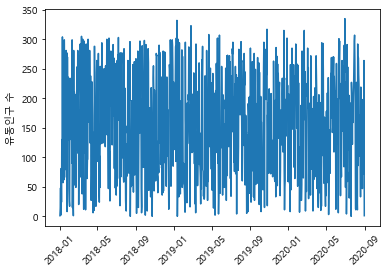

In [9]:
plt.plot(group_HT_CLTURART_DYNMC_POPLTN_ANALS.columns, group_HT_CLTURART_DYNMC_POPLTN_ANALS.loc["3∙15 아트센터"].values) #, log=True
plt.ylabel("유동인구 수")
plt.xticks(rotation=45)

In [4]:
!pip list

Package                Version
---------------------- -------------------
absl-py                0.10.0
appdirs                1.4.4
argon2-cffi            20.1.0
asgiref                3.2.10
astunparse             1.6.3
attrs                  20.1.0
audioread              2.1.8
backcall               0.2.0
bleach                 3.1.5
boto3                  1.14.61
botocore               1.17.61
brotlipy               0.7.0
cachetools             4.1.1
certifi                2020.6.20
cffi                   1.14.2
chardet                3.0.4
click                  7.1.2
colorama               0.4.3
cryptography           3.1
cycler                 0.10.0
dataclasses            0.7
decorator              4.4.2
defusedxml             0.6.0
Django                 3.0.3
docutils               0.15.2
entrypoints            0.3
filelock               3.0.12
gast                   0.3.3
google-auth            1.21.1
google-auth-oauthlib   0.4.1
google-pasta           0.2.0
grpcio          

In [24]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [63]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
# group_HT_CLTURART_DYNMC_POPLTN_ANALS.loc["3∙15 아트센터", :"2020-08-24"]
model = ARIMA(group_HT_CLTURART_DYNMC_POPLTN_ANALS.loc["3∙15 아트센터", :"2020-08-24"].values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  966
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5676.343
Method:                       css-mle   S.D. of innovations             85.951
Date:                Fri, 06 Nov 2020   AIC                          11364.687
Time:                        10:34:24   BIC                          11393.926
Sample:                             1   HQIC                         11375.818
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0068      0.012     -0.587      0.557      -0.029       0.016
ar.L1.D.y     -0.3336      0.329     -1.014      0.310      -0.978       0.311
ar.L2.D.y      0.1036      0.039      2.639      0.0

In [26]:
group_HT_CLTURART_DYNMC_POPLTN_ANALS["해남문화예술회관"]

KeyError: '해남문화예술회관'

In [30]:
# train_df = group_HT_CLTURART_DYNMC_POPLTN_ANALS.loc["3∙15 아트센터", :"2020-08-24"]
train_df = group_HT_CLTURART_DYNMC_POPLTN_ANALS.loc["해남문화예술회관", :"2020-08-31"]
train_df

base_de
2018-01-01     5
2018-01-02     8
2018-01-03    11
2018-01-04    11
2018-01-05    11
              ..
2020-08-27    27
2020-08-28    26
2020-08-29    34
2020-08-30    51
2020-08-31    32
Name: 해남문화예술회관, Length: 974, dtype: int64

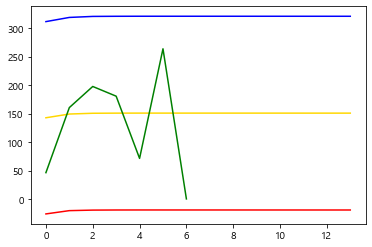

In [82]:
forecast_data = model_fit.forecast(steps=14) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.

# 테스트 데이터셋을 불러옵니다.
# test_file_path = '../data/market-price-test.csv'
# bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

# df = group_HT_CLTURART_DYNMC_POPLTN_ANALS.loc["3∙15 아트센터", "2020-08-25":]

# df.values

pred_y = forecast_data[0].tolist() # 마지막 5일의 예측 데이터입니다. (2018-08-27 ~ 2018-08-31)
test_y = df.values # 실제 5일 가격 데이터입니다. (2018-08-27 ~ 2018-08-31)
pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
    
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [181]:
pred_y

array([120.56993538, 125.8189273 , 113.6575255 , 126.46225884,
       130.1342075 , 126.01475065, 124.17576147])

In [105]:
list(group_HT_CLTURART_DYNMC_POPLTN_ANALS.columns)

[Timestamp('2018-01-01 00:00:00'),
 Timestamp('2018-01-02 00:00:00'),
 Timestamp('2018-01-03 00:00:00'),
 Timestamp('2018-01-04 00:00:00'),
 Timestamp('2018-01-05 00:00:00'),
 Timestamp('2018-01-06 00:00:00'),
 Timestamp('2018-01-07 00:00:00'),
 Timestamp('2018-01-08 00:00:00'),
 Timestamp('2018-01-09 00:00:00'),
 Timestamp('2018-01-10 00:00:00'),
 Timestamp('2018-01-11 00:00:00'),
 Timestamp('2018-01-12 00:00:00'),
 Timestamp('2018-01-13 00:00:00'),
 Timestamp('2018-01-14 00:00:00'),
 Timestamp('2018-01-15 00:00:00'),
 Timestamp('2018-01-16 00:00:00'),
 Timestamp('2018-01-17 00:00:00'),
 Timestamp('2018-01-18 00:00:00'),
 Timestamp('2018-01-19 00:00:00'),
 Timestamp('2018-01-20 00:00:00'),
 Timestamp('2018-01-21 00:00:00'),
 Timestamp('2018-01-22 00:00:00'),
 Timestamp('2018-01-23 00:00:00'),
 Timestamp('2018-01-24 00:00:00'),
 Timestamp('2018-01-25 00:00:00'),
 Timestamp('2018-01-26 00:00:00'),
 Timestamp('2018-01-27 00:00:00'),
 Timestamp('2018-01-28 00:00:00'),
 Timestamp('2018-01-

In [161]:
# conda install -c conda-forge fbprophet

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\gmlrn\Anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2020.02  |           py37_0           6 KB
    anaconda-custom            |           py37_1           3 KB
    beautifulsoup4-4.9.3       |     pyhb0f4dca_0          86 KB  conda-forge
    certifi-2020.6.20          |   py37hf50a25e_2         152 KB  conda-forge
    conda-4.9.0                |   py37hf50a25e_1         3.1 MB  conda-forge
    convertdate-2.2.2          |     pyh9f0ad1d_0          33 KB  conda-forge
    ephem-3.7.7.1              |   py37h4ab8f01_1         715 KB  conda-forge
    fbprophet-0.6              |   py37h653


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2020.02=py37_0
  - defaults/win-64::conda-build==3.18.11=py37_0

The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2020.02=py37_0
  - defaults/win-64::conda-build==3.18.11=py37_0


In [31]:
s2df = pd.DataFrame(train_df)
aaa = pd.DataFrame(train_df)
s2df.reset_index(inplace = True)
s2df.rename(columns = {"base_de" : "ds", "3∙15 아트센터" : "y"}, inplace=True)

aaa


해남문화예술회관
base_de             
2018-01-01         5
2018-01-02         8
2018-01-03        11
2018-01-04        11
2018-01-05        11
...              ...
2020-08-27        27
2020-08-28        26
2020-08-29        34
2020-08-30        51
2020-08-31        32

[974 rows x 1 columns]

In [32]:
 #MS는인덱스는 해당 월의 마지막 일자로 표시를 시작일로 변경
bbb = aaa['해남문화예술회관'].resample('MS').mean()
bbb

base_de
2018-01-01     8.806452
2018-02-01     9.785714
2018-03-01    18.935484
2018-04-01    12.866667
2018-05-01    21.258065
2018-06-01    20.700000
2018-07-01    16.516129
2018-08-01    19.129032
2018-09-01    29.300000
2018-10-01    25.096774
2018-11-01    43.100000
2018-12-01    35.838710
2019-01-01    19.806452
2019-02-01    27.214286
2019-03-01    41.064516
2019-04-01    32.700000
2019-05-01    66.903226
2019-06-01    34.966667
2019-07-01    38.645161
2019-08-01    47.064516
2019-09-01    57.900000
2019-10-01    35.935484
2019-11-01    32.833333
2019-12-01    17.193548
2020-01-01    26.548387
2020-02-01    13.206897
2020-03-01    41.161290
2020-04-01    13.300000
2020-05-01    23.677419
2020-06-01    26.200000
2020-07-01    39.838710
2020-08-01    26.322581
Freq: MS, Name: 해남문화예술회관, dtype: float64

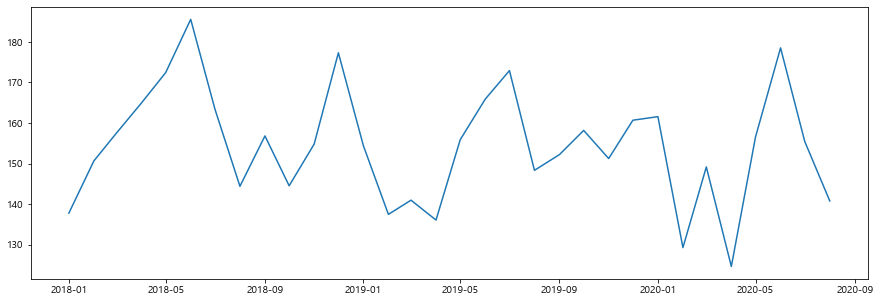

In [197]:
plt.figure(figsize=(15,5))
plt.plot(bbb)

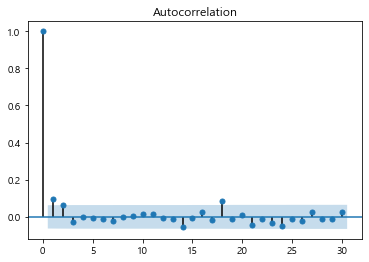

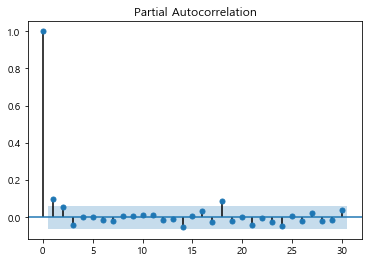

In [137]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(aaa)
plot_pacf(aaa)
plt.show()

C:\Users\gmlrn\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gmlrn\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


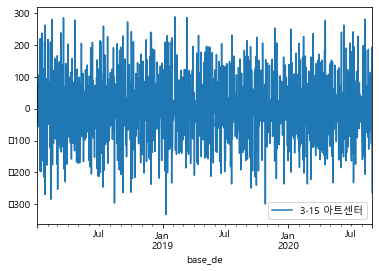

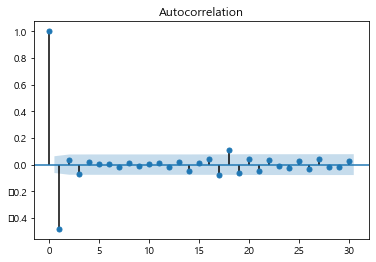

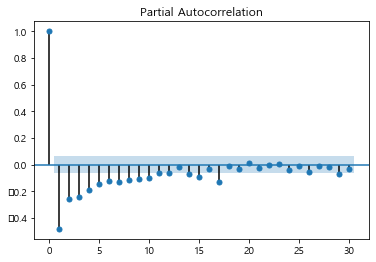

In [138]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1=aaa.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [33]:
from statsmodels.tsa.arima_model import ARIMA

model2 = ARIMA(bbb, order=(2,1,1))
model_fit2 = model2.fit(trend='nc',full_output=True, disp=1)
print(model_fit2.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.해남문화예술회관   No. Observations:                   31
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -121.186
Method:                       css-mle   S.D. of innovations             11.719
Date:                Fri, 06 Nov 2020   AIC                            250.371
Time:                        18:49:01   BIC                            256.107
Sample:                    02-01-2018   HQIC                           252.241
                         - 08-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
ar.L1.D.해남문화예술회관     0.3208      0.173      1.849      0.064      -0.019       0.661
ar.L2.D.해남문화예술회관     0.4072      0.180      2.267      0.023       0.055       0.759
ma.L1.D.해남문화예술회관    -1.0000 

C:\Users\gmlrn\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\gmlrn\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\gmlrn\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\gmlrn\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\gmlrn\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


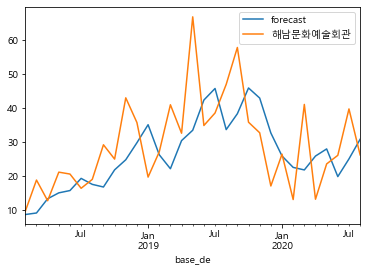

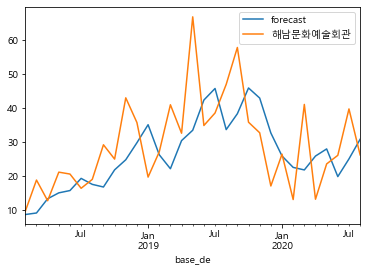

In [34]:
model_fit2.plot_predict()

In [35]:
fore = model_fit2.forecast(steps=6)
# print(fore[0])

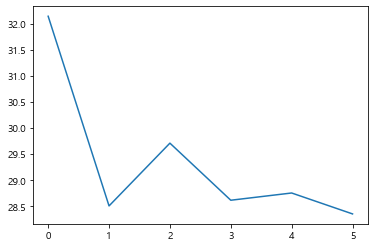

In [37]:
plt.plot(fore[0])


In [253]:
import statsmodels
print(statsmodels.__version__)

0.11.0


In [38]:
from statsmodels.tsa.arima_model import ARIMA

model3 = ARIMA(aaa, order=(2,1,0))
model_fit3 = model3.fit(trend='nc',full_output=True, disp=1)
print(model_fit3.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.해남문화예술회관   No. Observations:                  973
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -4191.392
Method:                       css-mle   S.D. of innovations             17.968
Date:                Fri, 06 Nov 2020   AIC                           8388.784
Time:                        18:49:32   BIC                           8403.425
Sample:                    01-02-2018   HQIC                          8394.356
                         - 08-31-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
ar.L1.D.해남문화예술회관    -0.4863      0.031    -15.857      0.000      -0.546      -0.426
ar.L2.D.해남문화예술회관    -0.2908      0.031     -9.487      0.000      -0.351      -0.231
                            

C:\Users\gmlrn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\gmlrn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


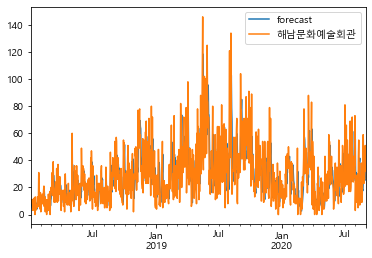

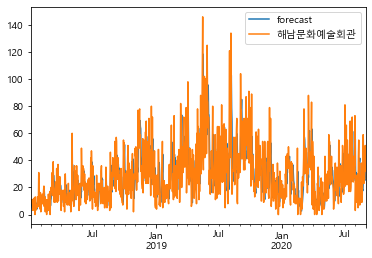

In [39]:
model_fit3.plot_predict()

In [40]:
fore1 = model_fit3.forecast(steps=7)
# print(fore[0])

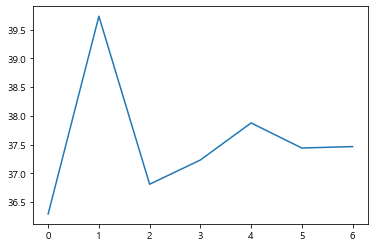

In [41]:
plt.plot(fore1[0])


LSTM

In [29]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(aaa, train_size = 0.8, shuffle=False)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()
scaler.fit(train)
train_trans = scaler.transform(train)
test_trans = scaler.transform(test)

In [32]:
pd.DataFrame(train_trans, index=train.index, columns=train.columns)

3∙15 아트센터
base_de              
2018-01-01   0.003012
2018-01-02   0.039157
2018-01-03   0.144578
2018-01-04   0.006024
2018-01-05   0.243976
...               ...
2020-02-08   0.219880
2020-02-09   0.259036
2020-02-10   0.081325
2020-02-11   0.566265
2020-02-12   0.081325

[773 rows x 1 columns]

In [35]:
def step_split(sequence, n_steps, n_features, n_predict_steps, test_set=False):
    sequence = np.array(sequence).reshape(-1, n_features)
    X, y = list(), list()
    if test_set:
        start_n = len(sequence) % n_steps 
        finish_n = len(sequence) - n_steps + 1
        for i in range(start_n, finish_n):
            seq_x = sequence[i:i+n_steps]
            X.append(seq_x)
            X = np.array(X)
            X = X.reshape(X.shape[0], n_steps, n_features)
    else:  
        start_n = (len(sequence) + n_predict_steps) % n_steps 
        finish_n = len(sequence) - n_predict_steps - n_steps + 1
        for i in range(start_n, finish_n):
            seq_x, seq_y = sequence[i:i+n_steps], sequence[i+n_steps:i+n_steps+n_predict_steps][:,0]
      
            X.append(seq_x)
            y.append(seq_y)
    X = np.array(X)
    y = np.array(y)
    X = X.reshape(X.shape[0], n_steps, n_features)
    y = y.reshape(y.shape[0], n_predict_steps)

    return X, y

In [36]:
n_steps = 20
n_features = 1
n_predict_steps = 1


x_train, y_train = step_split(train_trans, n_steps,n_features, n_predict_steps)
x_test, y_test = step_split(test_trans, n_steps,n_features, n_predict_steps)

In [37]:
pd.DataFrame(x_train.reshape(x_train.shape[1],x_train.shape[0]),
             index = [f'day{x+1}' for x in range(x_train.shape[1])],
             columns = [f'input_{x+1}' for x in range(x_train.shape[0])])

input_1   input_2   input_3   input_4   input_5   input_6   input_7  \
day1   0.900602  0.731928  0.237952  0.614458  0.659639  0.677711  0.846386   
day2   0.918675  0.147590  0.623494  0.337349  0.762048  0.737952  0.542169   
day3   0.186747  0.018072  0.292169  0.292169  0.903614  0.750000  0.481928   
day4   0.753012  0.656627  0.385542  0.120482  0.072289  0.307229  0.147590   
day5   0.144578  0.373494  0.746988  0.108434  0.581325  0.843373  0.563253   
day6   0.367470  0.204819  0.460843  0.424699  0.795181  0.493976  0.548193   
day7   0.843373  0.051205  0.045181  0.340361  0.617470  0.587349  0.536145   
day8   0.256024  0.222892  0.554217  0.295181  0.183735  0.099398  0.222892   
day9   0.481928  0.265060  0.569277  0.710843  0.246988  0.259036  0.108434   
day10  0.388554  0.789157  0.900602  0.873494  0.746988  0.256024  0.686747   
day11  0.406627  0.189759  0.271084  0.165663  0.159639  0.132530  0.075301   
day12  0.524096  0.268072  0.623494  0.063253  0.430723  0.018072  0.879518   
day13  0.207831  0.692771  0.165663  0.153614  0.846386  0.596386  0.340361   
day14  0.659639  0.325301  0.906627  0.909639  0.271084  0.319277  0.012048   
day15  0.659639  0.521084  0.478916  0.355422  0.762048  0.819277  0.638554   
day16  0.765060  0.746988  0.780120  0.518072  0.659639  0.572289  0.891566   
day17  0.858434  0.548193  0.072289  0.569277  0.376506  0.331325  0.789157   
day18  0.316265  0.346386  0.283133  0.165663  0.135542  0.500000  0.759036   
day19  0.240964  0.325301  0.792169  0.530120  0.388554  0.192771  0.177711   
day20  0.237952  0.033133  0.150602  0.183735  0.596386  0.518072  0.409639   

        input_8   input_9  input_10  ...  input_730  input_731  input_732  \
day1   0.198795  0.834337  0.024096  ...   0.822289   0.060241   0.343373   
day2   0.846386  0.322289  0.822289  ...   0.846386   0.695783   0.373494   
day3   0.524096  0.548193  0.846386  ...   0.370482   0.557229   0.551205   
day4   0.765060  0.635542  0.370482  ...   0.364458   0.584337   0.725904   
day5   0.737952  0.825301  0.364458  ...   0.201807   0.174699   0.855422   
day6   0.298193  0.515060  0.201807  ...   0.210843   0.762048   0.629518   
day7   0.704819  0.789157  0.210843  ...   0.876506   0.819277   0.159639   
day8   0.006024  0.734940  0.876506  ...   0.213855   0.201807   0.120482   
day9   0.602410  0.822289  0.213855  ...   0.228916   0.036145   0.475904   
day10  0.400602  0.677711  0.228916  ...   0.500000   0.250000   0.114458   
day11  0.021084  0.888554  0.496988  ...   0.475904   0.551205   0.361446   
day12  0.490964  0.560241  0.475904  ...   0.177711   0.394578   0.237952   
day13  0.081325  0.421687  0.177711  ...   0.924699   0.629518   0.117470   
day14  0.108434  0.638554  0.924699  ...   0.593373   0.102410   0.394578   
day15  0.789157  0.192771  0.593373  ...   0.271084   0.180723   0.313253   
day16  0.608434  0.487952  0.271084  ...   0.560241   0.099398   0.683735   
day17  0.524096  0.231928  0.560241  ...   0.045181   0.665663   0.852410   
day18  0.888554  0.400602  0.045181  ...   0.099398   0.861446   0.804217   
day19  0.533133  0.593373  0.099398  ...   0.909639   0.560241   0.668675   
day20  0.704819  0.695783  0.909639  ...   0.216867   0.680723   0.328313   

       input_733  input_734  input_735  input_736  input_737  input_738  \
day1    0.542169   0.198795   0.436747   0.879518   0.662651   0.578313   
day2    0.716867   0.557229   0.081325   0.213855   0.686747   0.632530   
day3    0.885542   0.385542   0.436747   0.373494   0.539157   0.680723   
day4    0.876506   0.689759   0.512048   0.807229   0.243976   0.704819   
day5    0.340361   0.620482   0.653614   0.349398   0.081325   0.033133   
day6    0.222892   0.804217   0.183735   0.015060   0.171687   0.575301   
day7    0.415663   0.027108   0.659639   0.683735   0.855422   0.783133   
day8    0.382530   0.271084   0.222892   0.873494   0.373494   0.837349   
day9    0.774096   0.753012   0.578313   0.900602   0.8

In [39]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

Epoch 1 / 11
Train on 739 samples, validate on 159 samples
739/739 [==============================] - 4s 5ms/sample - loss: 0.0832 - val_loss: 0.0702


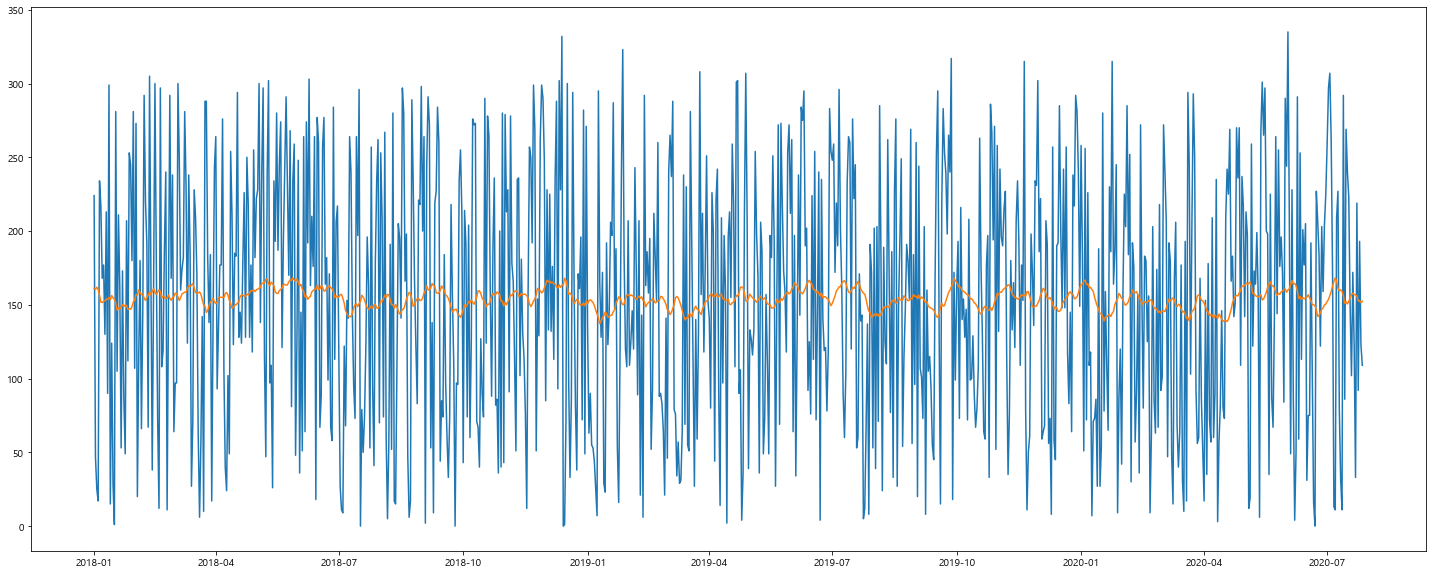

Epoch 2 / 11
Train on 739 samples, validate on 159 samples
739/739 [==============================] - 3s 5ms/sample - loss: 0.0692 - val_loss: 0.0694
Epoch 3 / 11
Train on 739 samples, validate on 159 samples
739/739 [==============================] - 3s 5ms/sample - loss: 0.0684 - val_loss: 0.0689
Epoch 4 / 11
Train on 739 samples, validate on 159 samples
739/739 [==============================] - 3s 5ms/sample - loss: 0.0680 - val_loss: 0.0686
Epoch 5 / 11
Train on 739 samples, validate on 159 samples
739/739 [==============================] - 3s 5ms/sample - loss: 0.0677 - val_loss: 0.0684
Epoch 6 / 11
Train on 739 samples, validate on 159 samples
739/739 [==============================] - 4s 5ms/sample - loss: 0.0676 - val_loss: 0.0682


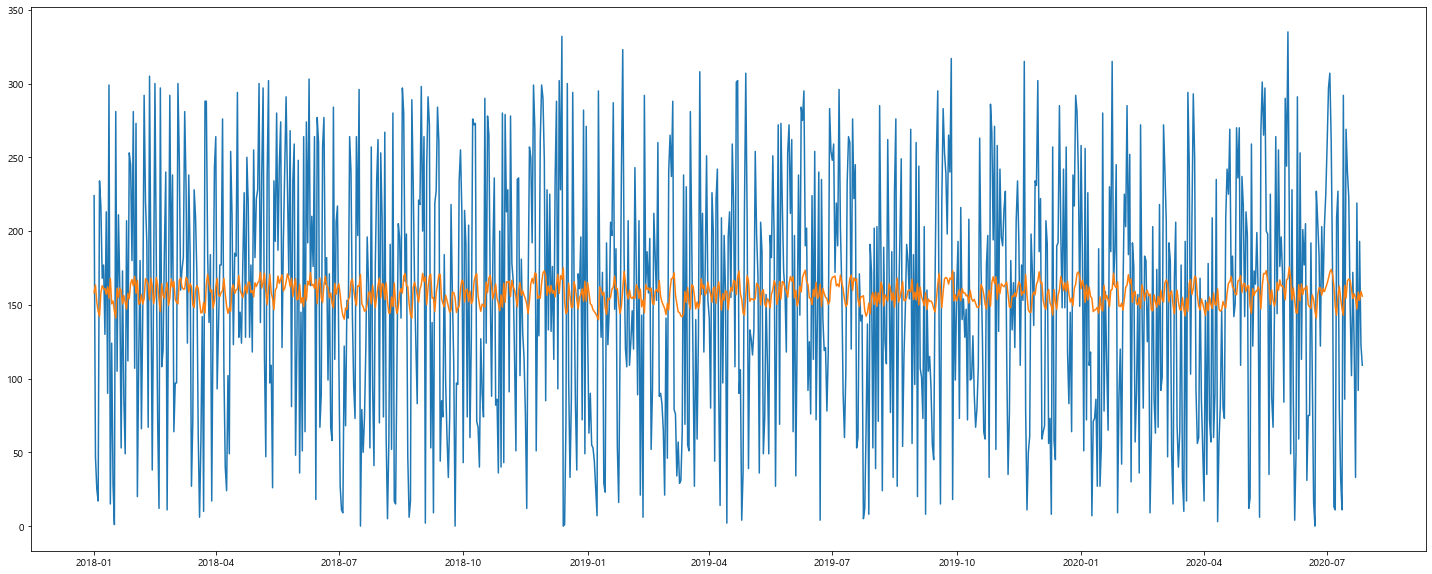

Epoch 7 / 11
Train on 739 samples, validate on 159 samples
739/739 [==============================] - 4s 5ms/sample - loss: 0.0674 - val_loss: 0.0681
Epoch 8 / 11
Train on 739 samples, validate on 159 samples
739/739 [==============================] - 4s 5ms/sample - loss: 0.0673 - val_loss: 0.0681
Epoch 9 / 11
Train on 739 samples, validate on 159 samples
739/739 [==============================] - 4s 5ms/sample - loss: 0.0673 - val_loss: 0.0681
Epoch 10 / 11
Train on 739 samples, validate on 159 samples
739/739 [==============================] - 4s 5ms/sample - loss: 0.0672 - val_loss: 0.0681
Epoch 11 / 11
Train on 739 samples, validate on 159 samples
739/739 [==============================] - 4s 5ms/sample - loss: 0.0672 - val_loss: 0.0681


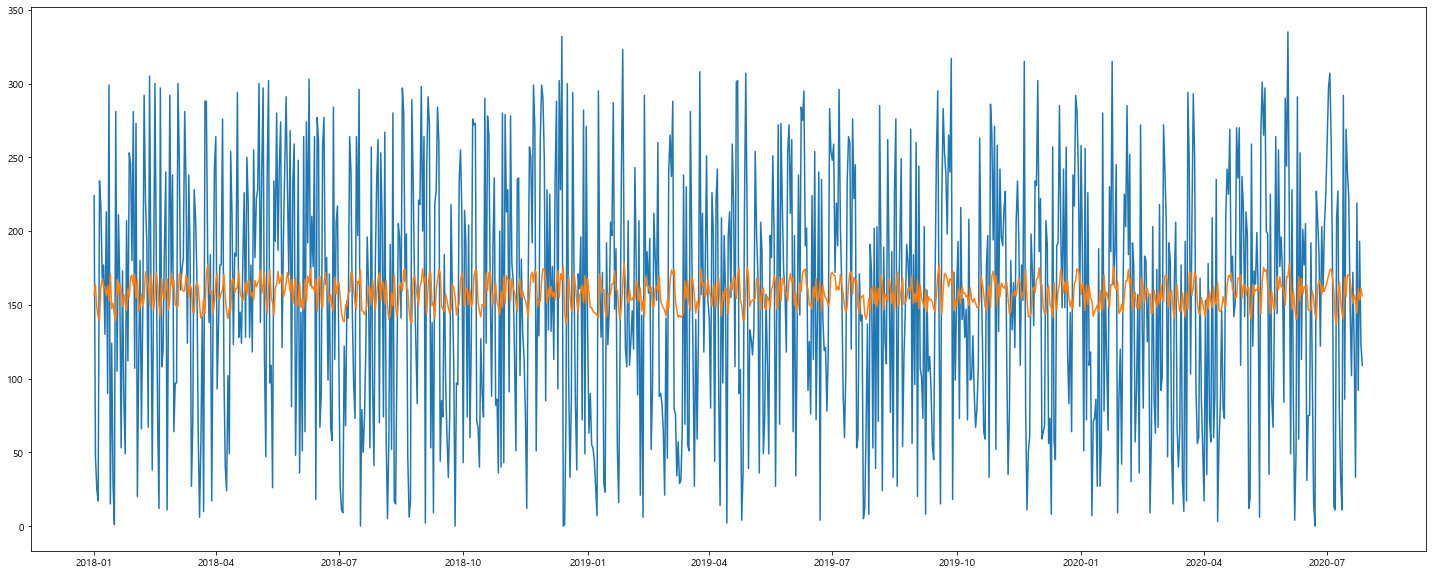

In [43]:
def create_model(stateful,batch_size, n_steps, n_features):
    model = Sequential()
    model.add(LSTM(16,
                   batch_input_shape=(batch_size, n_steps, n_features),
                   stateful=stateful
                   ))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model

batch_size = 1
epochs = 11

x, y = step_split(scaler.transform(aaa), n_steps, n_features, n_predict_steps)
y = scaler.inverse_transform(y)


model_stateful = create_model(True, batch_size, n_steps, n_features)

for i in range(epochs): 
    print('Epoch', i + 1, '/', epochs)
    model_stateful.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=1,
                      verbose=1,
                      shuffle=False,
                      validation_data=(x_test, y_test)
                       )
    if i % 5 == 0:
        y_hat = model_stateful.predict(x, batch_size=batch_size)
        y_hat = scaler.inverse_transform(y_hat)

        plt.figure(figsize=(25, 10))
        plt.plot(aaa.index[:len(y_hat)],y[:len(y_hat)])
        plt.plot(aaa.index[:len(y_hat)],y_hat)
        plt.show()

정상 시계열 확인

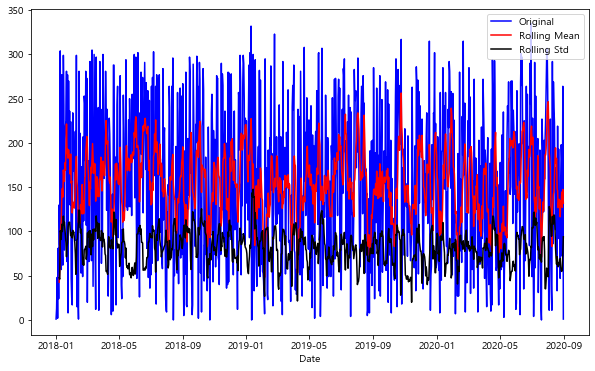

In [89]:
def plot_rolling(data, interval):
    
    rolmean = data.rolling(interval).mean()
    rolstd = data.rolling(interval).std()

    #Plot rolling statistics:
    plt.figure(figsize=(10, 6))
    plt.xlabel('Date')
    orig = plt.plot(data, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show()
plot_rolling(aaa, 7)

In [94]:
aaa

3∙15 아트센터
base_de              
2018-01-01        1.0
2018-01-02       13.0
2018-01-03       48.0
2018-01-04        2.0
2018-01-05       81.0
...               ...
2020-08-27      198.0
2020-08-28      181.0
2020-08-29       72.0
2020-08-30      264.0
2020-08-31        1.0

[974 rows x 1 columns]

In [95]:
from statsmodels.tsa.stattools import adfuller

y = aaa['3∙15 아트센터']
y_1diff = aaa.diff().dropna()['3∙15 아트센터']
result = adfuller(y)
print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
print(f'원 데이터 p-value: {result[1]:.3f}')
result = adfuller(y_1diff)
print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
print(f'1차 차분 p-value: {result[1]:.3f}')

원 데이터 ADF Statistic: -17.475
원 데이터 p-value: 0.000
1차 차분 ADF Statistic: -13.920
1차 차분 p-value: 0.000


차분을 하지 않은 원 데이터는 p-value가 유의 수준인 0.05보다 크므로 정상 시계열로 볼 수 없다.

이에 비해 1차 차분의 데이터는 p-value가 유의 수준보다 작으므로 정상 시계열로 볼 수 있다.

이로서 차분(d)의 차수는 1인 ARIMA(p, 1, q)의 모델 구축이 필요하다는 것을 알 수 있다.

In [96]:
def my_auto_arima(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p{p} d{d} q{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df

In [97]:
my_auto_arima(aaa,[3,3,3])

C:\Users\gmlrn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\gmlrn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\gmlrn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\gmlrn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\gmlrn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\gmlrn\

order           AIC
19  p2 d1 q1  11447.097652
20  p2 d1 q2  11447.774592
12  p1 d1 q1  11448.403558
13  p1 d1 q2  11448.674677
2   p0 d0 q2  11448.902712
5   p0 d1 q2  11449.466781
15  p2 d0 q0  11449.724635
16  p2 d0 q1  11450.386827
9   p1 d0 q0  11450.982757
10  p1 d0 q1  11451.290785
17  p2 d0 q2  11452.018511
1   p0 d0 q1  11452.029170
4   p0 d1 q1  11455.549861
0   p0 d0 q0  11458.044148
8   p0 d2 q2  11468.107074
18  p2 d1 q0  11698.592994
11  p1 d1 q0  11763.451093
7   p0 d2 q1  12017.580464
3   p0 d1 q0  12020.071614
21  p2 d2 q0  12259.074732
14  p1 d2 q0  12476.448900
6   p0 d2 q0  13063.146869

In [102]:
aaa

3∙15 아트센터
base_de              
2018-01-01        1.0
2018-01-02       13.0
2018-01-03       48.0
2018-01-04        2.0
2018-01-05       81.0
...               ...
2020-08-27      198.0
2020-08-28      181.0
2020-08-29       72.0
2020-08-30      264.0
2020-08-31        1.0

[974 rows x 1 columns]

C:\Users\gmlrn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\gmlrn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.3∙15 아트센터   No. Observations:                  973
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -5718.549
Method:                       css-mle   S.D. of innovations             86.051
Date:                Fri, 06 Nov 2020   AIC                          11447.098
Time:                        13:43:49   BIC                          11471.500
Sample:                    01-02-2018   HQIC                         11456.384
                         - 08-31-2020                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0076      0.012     -0.661      0.509      -0.030       0.015
ar.L1.D.3∙15 아트센터     0.0915      0.032      2.851      0.004       0.029       0.154
ar.L2.D.3∙15 아트센터     0.

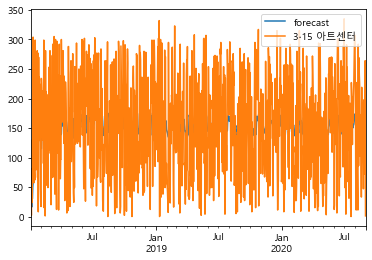

In [104]:
arima_model = ARIMA(aaa, (2,1,1))
model_fit1 = arima_model.fit()
print(model_fit1.summary())
model_fit1.plot_predict()
plt.show()

In [100]:
import datetime

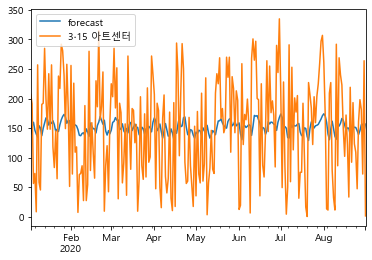

In [105]:
model_fit1.plot_predict(start=datetime.datetime(2020,1,3))
plt.show()

C:\Users\gmlrn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\gmlrn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


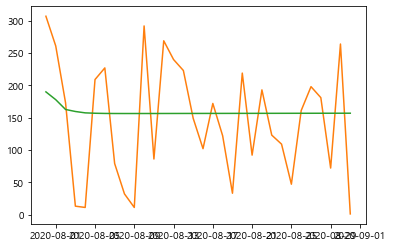

In [110]:
train, test = aaa.loc[datetime.datetime(2019,7,31):datetime.datetime(2020,7,31),:], aaa.loc[datetime.datetime(2020,7,31):,:]
model = ARIMA(train,(2,1,1))
model_fit = model.fit()
full_forecast = model_fit.forecast(steps=test.shape[0])
forecast = pd.DataFrame(full_forecast[0], index=test.index, columns=test.columns)
plt.plot(train.loc[datetime.datetime(2020,7,31):,:])
plt.plot(test)
plt.plot(forecast)

prophet

In [46]:
from fbprophet import Prophet

# prophet을 사용하기 위해서는 다음과 같이 피처의 이름을 변경해야 합니다 : 'ds', 'y'

prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(s2df)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
C:\Users\gmlrn\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [175]:
# 5일을 내다보며 예측합니다.
future_data = prophet.make_future_dataframe(periods=7, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

ds        yhat  yhat_lower  yhat_upper
967 2020-08-25  120.569935   11.542063  228.931019
968 2020-08-26  125.818927   11.731226  235.022873
969 2020-08-27  113.657525    8.035915  221.682984
970 2020-08-28  126.462259   24.484035  234.634849
971 2020-08-29  130.134208   28.303403  240.707826
972 2020-08-30  126.014751   16.419484  232.965005
973 2020-08-31  124.175761    6.775765  234.961320

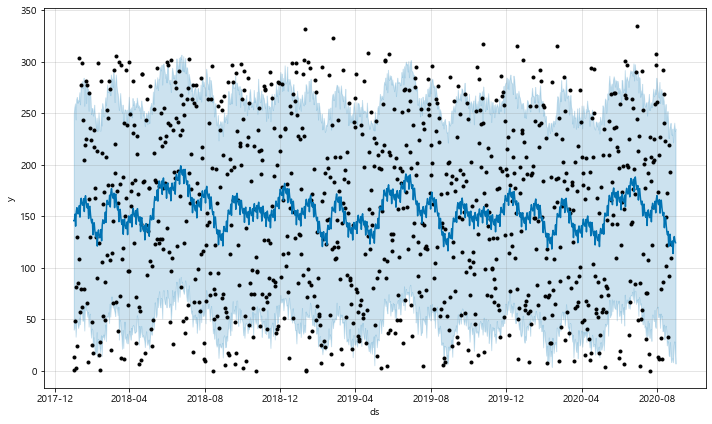

In [176]:
fig1 = prophet.plot(forecast_data)

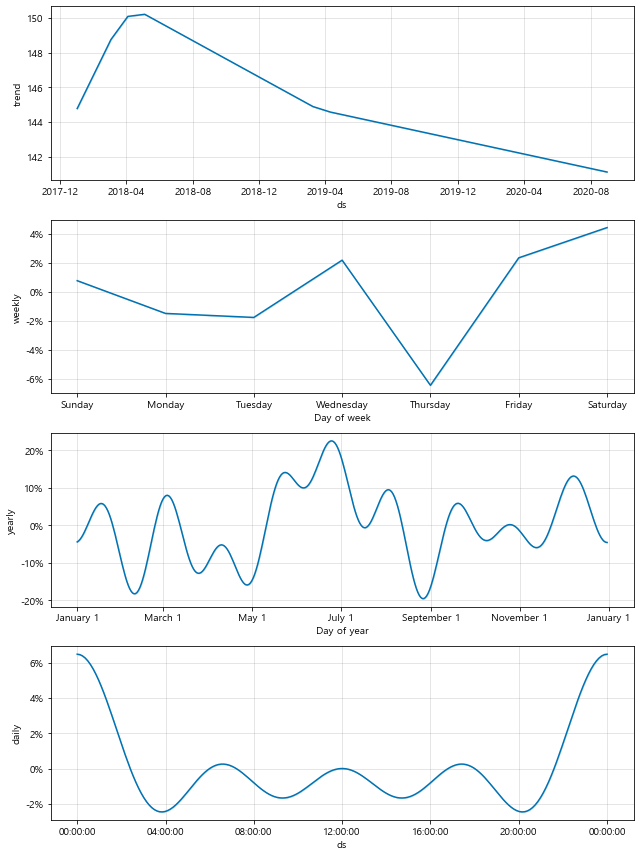

In [177]:
fig2 = prophet.plot_components(forecast_data)

In [178]:
test_df = pd.DataFrame(df)
test_df.reset_index(inplace = True)
test_df.rename(columns = {"base_de" : "ds", "3∙15 아트센터" : "y"}, inplace=True)
test_df

ds      y
0 2020-08-25   47.0
1 2020-08-26  161.0
2 2020-08-27  198.0
3 2020-08-28  181.0
4 2020-08-29   72.0
5 2020-08-30  264.0
6 2020-08-31    1.0

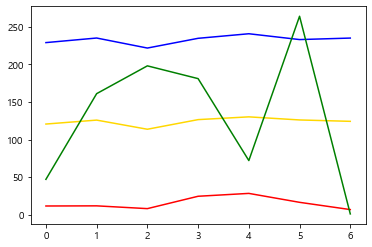

In [180]:
# bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

pred_y = forecast_data.yhat.values[-7:] # 마지막 5일의 예측 데이터입니다. (2018-08-27 ~ 2018-08-31)
test_y = test_df.y.values # 실제 5일 가격 데이터입니다. (2018-08-27 ~ 2018-08-31)
pred_y_lower = forecast_data.yhat_lower.values[-7:] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = forecast_data.yhat_upper.values[-7:] # 마지막 5일의 예측 데이터의 최대값입니다.

plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [72]:
m = Prophet()

In [73]:
m.fit(s2df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\gmlrn\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


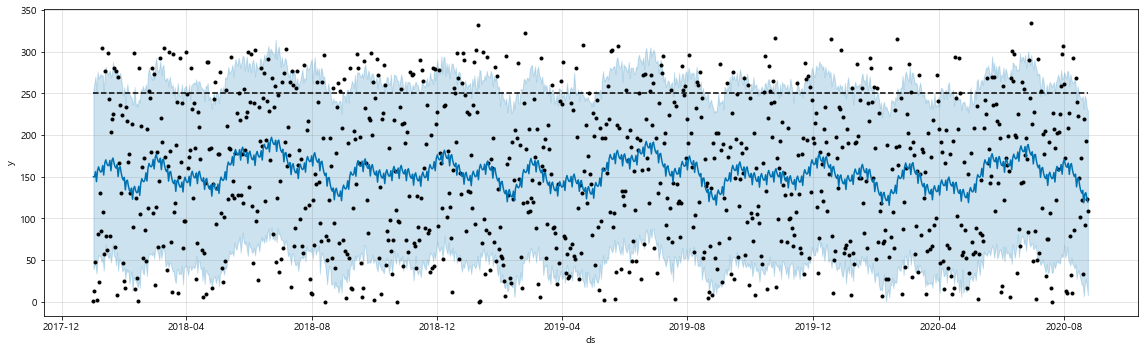

In [74]:
forecast = m.predict(s2df)
fig, ax = plt.subplots(figsize=(16,5))
m.plot(forecast, ax=ax)
plt.show()

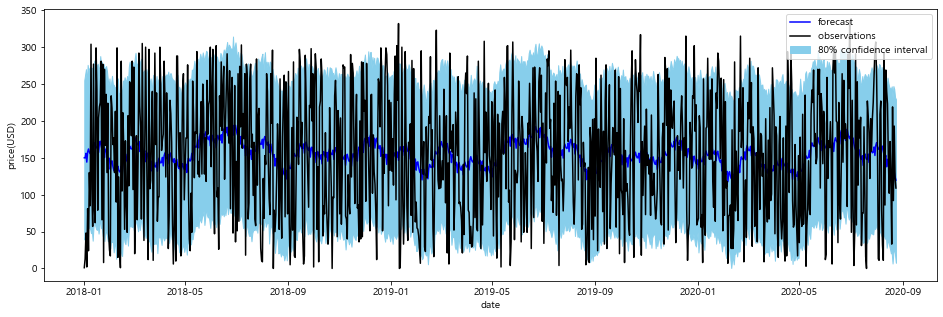

In [75]:
fig, ax = plt.subplots(figsize=(16,5))

plt.plot(forecast['ds'].dt.to_pydatetime(),forecast['yhat'], label='forecast', color='blue')
plt.plot(s2df['ds'].dt.to_pydatetime(),s2df['y'], label='observations ', color='black')
plt.fill_between(forecast['ds'].dt.to_pydatetime(), forecast['yhat_upper'],forecast['yhat_lower'],color='skyblue',label='80% confidence interval')
plt.legend()
plt.xlabel('date')
plt.ylabel('price(USD)')
plt.show()

C:\Users\gmlrn\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gmlrn\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


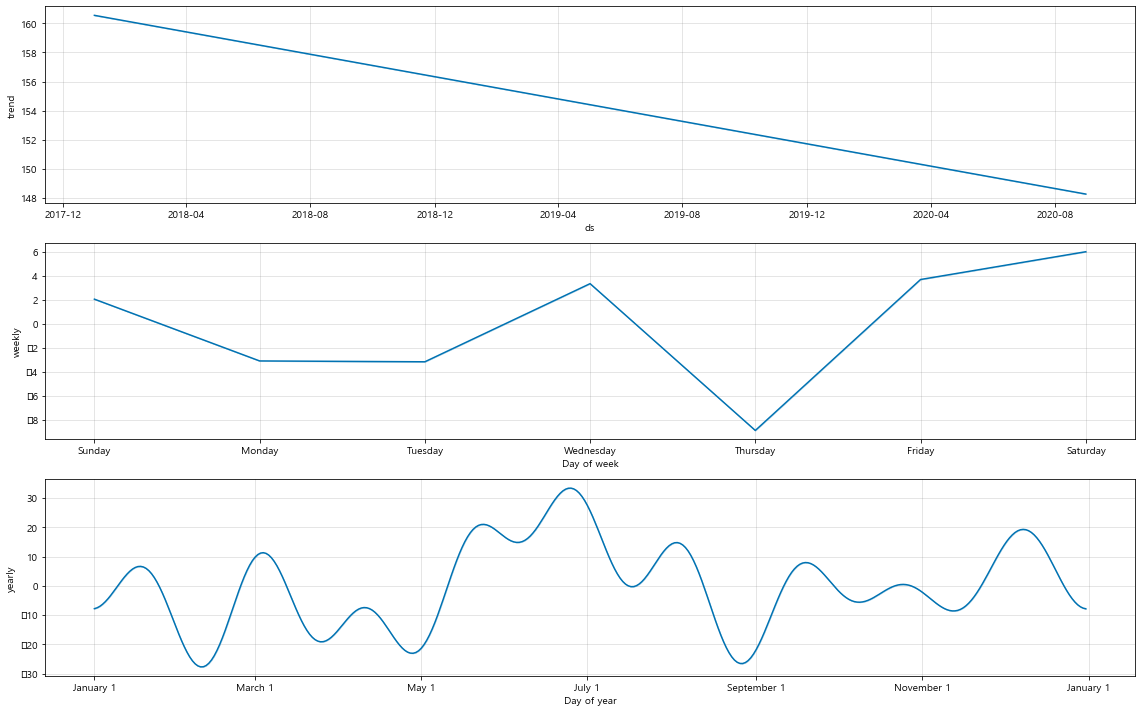

In [113]:
m.plot_components(forecast,figsize=(16,10))
plt.show()

In [117]:
future =  m.make_future_dataframe(periods=30)
future

ds
0    2018-01-01
1    2018-01-02
2    2018-01-03
3    2018-01-04
4    2018-01-05
...         ...
999  2020-09-26
1000 2020-09-27
1001 2020-09-28
1002 2020-09-29
1003 2020-09-30

[1004 rows x 1 columns]

In [121]:
forecast['ds'].dt.to_pydatetime()[-1]

datetime.datetime(2020, 9, 30, 0, 0)

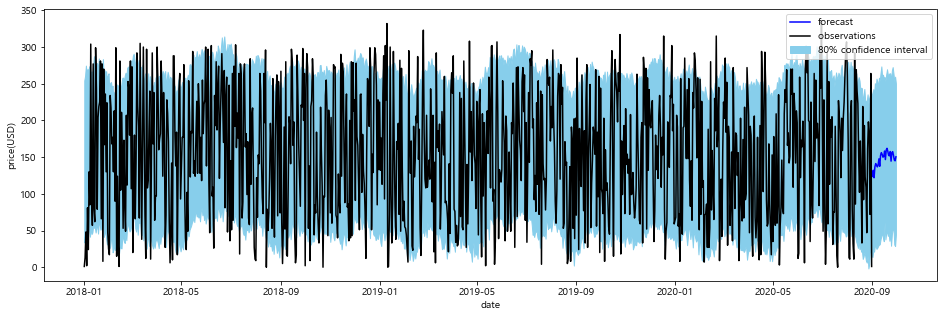

In [122]:
forecast = m.predict(future)
fig, ax = plt.subplots(figsize=(16,5))

plt.plot(forecast['ds'].dt.to_pydatetime()[-30:],forecast['yhat'][-30:], label='forecast', color='blue')
plt.plot(s2df['ds'].dt.to_pydatetime(),s2df['y'], label='observations ', color='black')
plt.fill_between(forecast['ds'].dt.to_pydatetime(), forecast['yhat_upper'],forecast['yhat_lower'],color='skyblue',label='80% confidence interval')
plt.legend()
plt.xlabel('date')
plt.ylabel('price(USD)')
plt.show()

In [71]:
print(forecast)

            ds       trend  cap  floor  yhat_lower  yhat_upper  trend_lower  \
0   2018-01-01  150.636479  250     50   27.731270  243.982196   150.636479   
1   2018-01-02  150.641947  250     50   33.256270  251.771599   150.641947   
2   2018-01-03  150.647415  250     50   30.906991  263.867283   150.647415   
3   2018-01-04  150.652883  250     50   29.853161  247.070602   150.652883   
4   2018-01-05  150.658351  250     50   43.497912  252.813438   150.658351   
..         ...         ...  ...    ...         ...         ...          ...   
962 2020-08-20  155.672572  250     50   21.970960  230.752928   155.672572   
963 2020-08-21  155.677772  250     50   23.561998  242.237397   155.677772   
964 2020-08-22  155.682973  250     50   35.274619  238.934543   155.682973   
965 2020-08-23  155.688173  250     50   25.396416  237.537287   155.688173   
966 2020-08-24  155.693373  250     50   16.736496  227.054256   155.693373   

     trend_upper  additive_terms  additive_terms_lo

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\gmlrn\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


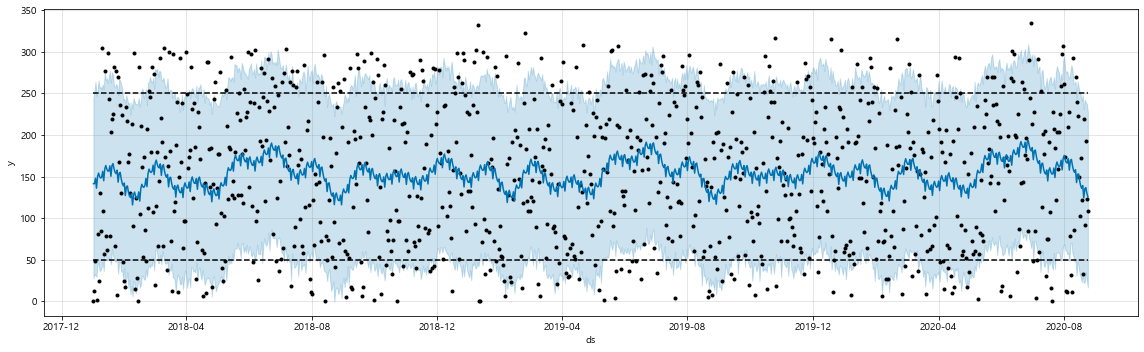

In [59]:
m = Prophet(growth = 'logistic')

s2df['cap'] = 250
s2df['floor'] = 50
m.fit(s2df)
forecast = m.predict(s2df)
fig, ax = plt.subplots(figsize=(16,5))
m.plot(forecast, ax=ax)
plt.show()

In [131]:
s2df[s2df["y"] == 0.0]

ds    y  cap  floor
225 2018-08-14  0.0  0.0    0.0
295 2018-10-23  0.0  0.0    0.0
375 2019-01-11  0.0  0.0    0.0
931 2020-07-20  0.0  0.0    0.0

In [129]:
m = Prophet(growth = 'logistic')
# prophet_series = pd.DataFrame(list(zip(gold_price_series.index, gold_price_series['price(USD)'])),columns=['ds', 'y'])
s2df['cap'] = s2df['y'] * 1.1
s2df['floor'] = s2df['y'] * 0.9
m.fit(s2df)
forecast = m.predict(s2df)
fig, ax = plt.subplots(figsize=(16,5))
m.plot(forecast, ax=ax)
plt.show()

ValueError: cap must be greater than floor (which defaults to 0).

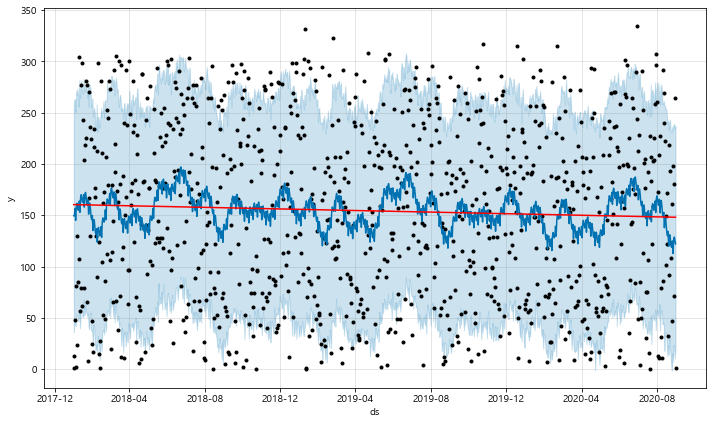

In [126]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\gmlrn\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


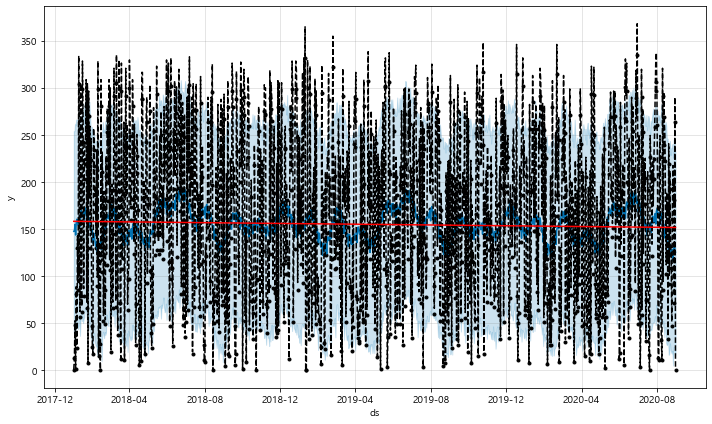

In [136]:
m = Prophet(changepoint_prior_scale=0.01)
m.fit(s2df)
forecast = m.predict(s2df)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [143]:
import plotly.graph_objects as go

import pandas as pd


# Create figure
fig = go.Figure()

fig.add_trace(
#     go.Scatter(x=list(df.Date), y=list(df.High)))
    go.Scatter(x=list(group_HT_CLTURART_DYNMC_POPLTN_ANALS.columns), y=list(group_HT_CLTURART_DYNMC_POPLTN_ANALS.loc["3∙15 아트센터"].values)))
    
    

# Set title
fig.update_layout(
    title="<b>3∙15 아트센터</b>"+"<br>유동인구 수", title_x=0.5, font_family='S-CoreDream'

)
fig.update_layout({
#     "plot_bgcolor":'rgba(255,255,255,0)', #rgbrgb(173, 111, 28)
#     "paper_bgcolor":'rgba(0,0,0,0)',
#     "paper_bgcolor":'rgba(225,136,28,1)', #rgb(225, 136, 28)
})


# Add range slider
fig.update_layout(
#     plot_bgcolor="#FFF",  # Sets background color to white
    xaxis=dict(
        
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )

)

fig.show()

In [50]:
import datetime
def getDay(x):
    daylist = ["월", "화", "수", "목", "금", "토", "일"]
    return daylist[datetime.date(int(x[0]),int(x[1]),int(x[2][:2])).weekday()]

In [51]:
HT_CLTURART_DYNMC_POPLTN_ANALS["요일"] = HT_CLTURART_DYNMC_POPLTN_ANALS["base_de"].apply(lambda x : getDay(str(x).split("-")))

In [52]:
HT_CLTURART_DYNMC_POPLTN_ANALS[HT_CLTURART_DYNMC_POPLTN_ANALS["fclty_id"] == "AC10"][800:810]

fclty_id   fclty_nm    base_de  lcls_10s_belo_male_co  \
220793     AC10  미아리고개예술극장 2018-02-03                    298   
220794     AC10  미아리고개예술극장 2018-02-04                     59   
220795     AC10  미아리고개예술극장 2018-02-05                    273   
220796     AC10  미아리고개예술극장 2018-02-06                    265   
220797     AC10  미아리고개예술극장 2018-02-07                    301   
220798     AC10  미아리고개예술극장 2018-02-08                    161   
220799     AC10  미아리고개예술극장 2018-02-09                    139   
220800     AC10  미아리고개예술극장 2018-02-10                     53   
220801     AC10  미아리고개예술극장 2018-02-11                      4   
220802     AC10  미아리고개예술극장 2018-02-12                    248   

        lcls_10s_male_co  lcls_20s_male_co  lcls_30s_male_co  \
220793               152               148               168   
220794               293                68               424   
220795               238               295               362   
220796               119               244                21   
220797                79               356               194   
220798               422               198               298   
220799               333                70               282   
220800               203               231                15   
220801               172               234                37   
220802                76               245               415   

        lcls_40s_male_co  lcls_50s_male_co  lcls_60s_above_male_co  ...  \
220793               390                 2                     193  ...   
220794               374               428                     343  ...   
220795               248               134                     257  ...   
220796               230                19                     174  ...   
220797               102                36                     273  ...   
220798               383               416                     124  ...   
220799                29               391                     136  ...   
220800                37               102                     331  ...   
220801                76               303                     171  ...   
220802               159                49                     100  ...   

        otsd_10s_belo_female_co  otsd_10s_female_co  otsd_20s_female_co  \
220793                      143                 304                 317   
220794                      265                 154                 321   
220795                       26                 196                 273   
220796                       52                  30                 220   
220797                      227                 253                 105   
220798                       47                  22                 174   
220799                      249                   8                 124   
220800                       81                 259                 303   
220801                       48                   3                 140   
220802                      193                  51                 236   

        otsd_30s_female_co  otsd_40s_female_co  otsd_50s_female_co  \
220793                  15                  74                  96   
220794                 248                 132                  85   
220795                 149                 121                  65   
220796                 170                  61                 180   
220797                  31                  54                  34   
220798                 156                 197                  13   
220799                 286                 222                 268   
220800                 112                 105                 159   
220801                 302                   5                  37   
220802                  22                 137                 265   

        otsd_60s_above_female_co  otsd_all_total_co  frnr_all_total_co  요일  
220793                       301               1854                202   토  
220794              

In [25]:
HT_CLTURART_DYNMC_POPLTN_ANALS.fclty_nm.unique()

array(['미아리고개예술극장', '예산군문예회관', '청양문화예술회관', '웃는얼굴아트센터', '충청남도문화예술회관',
       '대구문화예술회관', '충청남도교육청학생교육문화원', '태안군문화예술과', '홍주문화회관', '단양문화예술회관',
       '옥천문화예술회관', '음성문화예술회관', '제천시문화회관', '세종문화회관', '경주예술의전당', '증평문화회관',
       '진천화랑관', '청주예술의전당', '충주시문화회관', '충청북도중원교육문화원', '충청북도교육문화원',
       '세종시문화예술회관', '달성아트센터', '아양아트센터', '영등포아트홀', '대구오페라하우스', '수성아트피아',
       '대구학생문화센터', '대덕문화전당', '어울아트센터', '대구서구문화회관', '봉산문화회관', '대구콘서트하우스',
       '은평문화예술회관', '김천시문화예술회관', '포항시문화예술회관', '경산시민회관', '대가야문화누리',
       '구미시문화예술회관', '군위 삼국유사교육문화회관', '문경문화예술회관', '성주문화예술회관', '상주문화회관',
       '안동문화예술의전당', '정동극장', '천마아트센터', '울릉한마음회관', '예주문화예술회관', '영주문화예술회관',
       '영천시민회관', '예천군문화회관', '울진문화예술회관', '의성문화회관', '거제문화예술회관', '청송문화예술회관',
       '칠곡군교육문화회관', '아이들극장', '부산민주공원 공연장', '부산문화회관', '부산시민회관', '영화의전당',
       '금정문화회관', '동래문화회관', '북구문화빙상센터', '을숙도문화회관', '영도문화예술회관', '해운대문화회관',
       '충무아트센터', '부산광역시학생예술문화회관', '울산 중구문화의전당', '울산북구문화예술회관', '울산문화예술회관',
       '울주문화예술회관', '현대예술관', '거창군문화센터', '김해문화의전당', '밀양아리랑아트센터', '진해구민회관',


In [23]:
HT_CLTURART_FCLTY_INFO

fclty_id   fclty_nm                  area_addr  city_do_cd ctprvn_nm  \
0       AC56      구리아트홀           경기도 구리시 아차산로 453          31       경기도   
1      AC179   의령군민문화회관   경상남도 의령군 의령읍 의병로24길 31-1          38      경상남도   
2      AC180   창녕문화예술회관  경상남도 창녕군 창녕읍 우포2로 1189-25          38      경상남도   
3      AC181   하동문화예술회관    경상남도 하동군 하동읍 섬진강대로 2222          38      경상남도   
4      AC182   함안문화예술회관    경상남도 함안군 가야읍 함안대로 619-1          38      경상남도   
..       ...        ...                        ...         ...       ...   
222     AC83   홍천문화예술회관       강원도 홍천군 홍천읍 설악로 1792          32       강원도   
223    AC154     금정문화회관         부산광역시 금정구 체육공원로 7           21     부산광역시   
224    AC133  구미시문화예술회관           경상북도 구미시 송정대로 89          37      경상북도   
225    AC163   울산문화예술회관       울산광역시 남구 번영로 200(달동)          26     울산광역시   
226    AC127   대구문화예술회관       대구광역시 달서구 공원순환로 201           22     대구광역시   

     signgu_cd signgu_nm  adstrd_cd adstrd_nm         la          lo  
0        31120       구리시    3112053       인창동  37.595616  127.129851  
1        38310       의령군    3831011       의령읍  35.317759  128.264795  
2        38330       창녕군    3833011       창녕읍  35.544430  128.490326  
3        38360       하동군    3836011       하동읍  35.072412  127.741137  
4        38320       함안군    3832011       가야읍  35.283337  128.401362  
..         ...       ...        ...       ...        ...         ...  
222      32310       홍천군    3231011       홍천읍  37.688992  127.895478  
223      21110       금정구    2111069      구서1동  35.245866  129.094163  
224      37050       구미시    3705051       송정동  36.118322  128.349049  
225      26020        남구    2602056        달동  35.542902  129.327054  
226      22070       달서구    2207075       성당동  35.844668  128.558632  

[227 rows x 11 columns]

In [24]:
HT_CLTURART_FCLTY_INFO.ctprvn_nm.unique()

array(['경기도', '경상남도', '광주광역시', '전라남도', '전라북도', '제주특별자치도', '서울특별시',
       '인천광역시', '강원도', '대전광역시', '충청남도', '부산광역시', '충청북도', '세종특별자치시',
       '대구광역시', '경상북도', '울산광역시'], dtype=object)